# **Exploratory Data Analysis (EDA) of My Spotify Listening History**

### ***By Youssef ZEROUAL***
## **1 Introduction**

The present analysis draws upon my own spotify listening data downloaded from Spotify's "Extended Streaming History" request, consisting of JSON files covering the period from 2018 to 2025. Additionay, the main streaming data was combined with my 'liked' playlist data that I downloaded using Exportify, in order to enrich the main dataset with track features such as duration, energy, da,ceability, addition date, etc.

The primary objective of this EDA is to **uncover patterns, anomalies, and potential insights** within my extended listening history. The approach involves understanding the data structure and identifying trends, then generating further questions for deeper analysis based on observed patterns. The process includes data loading, cleaning, feature engineering, performing basic statistics, data aggregation, and visualization.

### **1.1 Purpose of the Analysis**

The analysis aims to address a variety of specific questions and provide insights into different aspects of the listening history. Below is a summary of these objectives:

##### **A. Understanding the Dataset**
This section focuses on exploring the structure, quality, and characteristics of the Spotify dataset:
- **Structure and Features**  
  - What is the structure of the downloaded Spotify data (e.g., features, missing values, distributions)?  
  - What is the total number of listening records and features in the dataset?  

- **Data Quality**  
  - Where are the missing values located in the initial data?  
  - How does merging with liked songs data affect the dataset dimensions and missing values?  
  - Which columns are irrelevant for music streaming analysis and should be removed?  
  - What is the impact of data cleaning steps (e.g., dropping rows with missing timestamps or track names) on the dataset size?  

- **Anomalies and Errors**  
  - Are there extremely short playbacks that might indicate logging errors?  
  - Are there instances of implausible playback durations within an hour, suggesting overlapping entries?

 

##### **B. Identifying Temporal Listening Trends**
This section examines how listening behavior evolves over time:
- **Yearly Trends**  
  - How have total listening hours evolved year-over-year?  
  - Which year was the most active for listening?  

- **Monthly Trends for the most active year**  
  - How did listening vary month-to-month in the most active year ?  
  - Which months had the most listening in the most active year?  
  - Were there seasonal patterns or spikes in the most active year listening?  
  - How evenly was Spotify used throughout the most active year?  

- **Monthly Trends (All Years)**  
  - How does listening behavior vary by month when aggregating data from all years?  
  - Are there consistent seasonal patterns in listening across multiple years?  
  - How does monthly listening compare when averaged across multiple years?  
  - How did monthly listening habits change year-over-year from 2018 to 2025?  
  - Did the same months consistently stand out for listening each year?  

- **Daily and Hourly Patterns**  
  - How does listening activity distribute across the days of the week?  
  - Which hours of the day have the peak engagement periods?  
  - Which hours have the lowest listening frequency?  

- **Sequential Analysis**  
  - What long-term trends are visible when viewing listening hours sequentially by month (`month_sequential_n`)?  
  - What short-term fluctuations and patterns are evident when viewing listening hours sequentially by day (`day_sequential_n`)?  
  - What patterns exist when viewing listening hours sequentially by hour (`hour_sequential_n`)?


##### **C. Investigating Song Curation Habits**
This section explores how new songs were added to the liked songs library:
- **Timeline of Additions**  
  - When were new songs added to the liked songs library?  
  - Which years saw the most song additions?  

- **Monthly and Yearly Rates**  
  - What was the rate of new song additions by month for each year?  

- **Genre Analysis for the most active year**  
  - What genres were most represented in the new songs added in the most active year?  

- **Overall Statistics**  
  - What are the overall statistics (total, max, min, mean, std) for new songs added per month across all years?  

- **Curation Spikes**  
  - Are there specific periods (e.g., certain months or years) that show intense curation spikes or declines?

##### **D. Analyzing Genre and Artist Preferences**
This section dives into genre and artist preferences based on listening behavior:
- **Genre Preferences**  
  - Which music genres have been listened to the most based on total hours played?  
  - How diverse or focused is the overall music taste?  
  - How much time was spent listening to the top genres?  

- **Artist Contributions**  
  - Which artists contributed most to the listening time in the top genre?  
  - Which specific tracks by the dominant artist in that genre were listened to most?  

- **Artist Rankings**  
  - Which artists have been listened to the most based on total playback hours?  
  - Which artists have been played most frequently based on play count?  
  - How do artists compare in terms of total playback hours vs. play count?
##### **E. Understanding Song Engagement and Popularity**
This section identifies the most popular and frequently played songs:
- **Most Played Songs**  
  - Which songs are the most frequently played?  
  - Which songs have been played across the most unique years?  
  - Which songs have been played on the most unique days?  
  - Which songs have appeared in the most unique hourly listening sessions?  

- **Peak Engagement Hours**  
  - What are the peak hours of the day for the top 3 most engaged songs?
### **1.2 Dataset Overview** 
- **Source**: Downloaded from [Spotify's "Extended Streaming History" data request](https://www.spotify.com/us/account/privacy/). and Exportify website.
- **Format**: The main streeming dataset is in JSON format (`endsong_*.json`) while the liked playlist is a csv file.
- **Period**: 2018-2025
- **Expected Variables**:  
  - Timestamps, track/artist names, play duration, skipped tracks, etc.  

### **1.3. Approach** 
The workflow for the exploratory data analysis (EDA) of the Spotify listening history begins by **loading and combining multiple JSON files containing streaming data from 2018 to 2025 into a single dataset**. Initial data inspection involves checking dimensions and identifying missing values, followed by **cleaning steps such as removing irrelevant podcast/audiobook columns** **and dropping rows with missing timestamps or track names**. The dataset is then **merged with liked songs data**, and **features are engineered to extract time-based information, calculate play metrics, and add sequential temporal identifiers**. Further data quality checks include filtering out extremely short playbacks and addressing anomalies like overlapping entries, before proceeding with various analyses on listening patterns by time, artists, genres, and song engagement.

## **2. Data preparation, inspection and cleaning**
### **2.1. Importing Required Libraries**
**Key Packages**:
- `pandas`: For data manipulation and analysis
- `numpy`: For numerical operations
- `seaborn` & `matplotlib`: For data visualization



In [463]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **2.2 Loading and Combining Spotify Data Files**

**Purpose**: Import and merge multiple JSON files containing streaming history into a single DataFrame for comprehensive analysis.

**Files Loaded**:
- 2018-2020
- 2020-2022
- 2022-2023
- 2023-2024
- 2024-2025

**Actions Performed**:
1. Each JSON file loaded separately as a DataFrame
2. All datasets combined using `pd.concat()`

**Why This Matters**:
- Creates unified dataset for full historical analysis
- Enables tracking of listening habits over 7-year period
- Provides foundation for all subsequent EDA
  

In [464]:
df_0 = pd.read_json('Streaming_History_Audio_2018-2020_0.json')
df_1 = pd.read_json('Streaming_History_Audio_2020-2022_1.json')
df_2 = pd.read_json('Streaming_History_Audio_2022-2023_2.json')
df_3 = pd.read_json('Streaming_History_Audio_2023-2024_3.json')
df_4 = pd.read_json('Streaming_History_Audio_2024-2025_4.json')

df_main = pd.concat([df_0, df_1, df_2, df_3, df_4])

### **1.3 Initial Data Inspection**
#### **1.3.1 Inspecting dataset dimensions**

**Why This Matters**:
- Gives first indication of dataset size
- Helps estimate computational requirements
- Sets expectations for analysis scope
- Verifies successful concatenation of all files

In [465]:
df_main.shape

(68731, 23)

**Output Interpretation**:
- **68,731 rows**: Total recorded listening events (2018-2025)
- **23 columns**: Available track/stream attributes

**Implications**:
- Substantial dataset (~69k plays) enables robust trend analysis
- 23 variables provide multiple dimensions for exploration (timestamps, track details, etc.)


#### **2.3.2 Checking for Missing Values**

**Why This Matters**:
- Missing data can skew analysis results
- Helps determine appropriate cleaning strategies
- Identifies potential data quality issues

In [466]:
df_main.isnull().sum()

ts                                       0
platform                                 0
ms_played                                0
conn_country                             0
ip_addr                                  0
master_metadata_track_name             195
master_metadata_album_artist_name      195
master_metadata_album_album_name       195
spotify_track_uri                      195
episode_name                         68536
episode_show_name                    68536
spotify_episode_uri                  68536
audiobook_title                      68731
audiobook_uri                        68731
audiobook_chapter_uri                68731
audiobook_chapter_title              68731
reason_start                             0
reason_end                               0
shuffle                                  0
skipped                                  0
offline                                  0
offline_timestamp                    41509
incognito_mode                           0
dtype: int6

##### **Key Findings**

- **195 missing entries** in track metadata:
  - Track names
  - Artist names  
  - Album names
  - Spotify URIs
- **All other columns complete** (0 missing values)

**Interpretation**:
✅ **Good Data Quality** for:
- Timestamps (`ts`)
- Play duration (`ms_played`)  
- User behavior metrics (`skipped`, `shuffle`)

⚠️ **Metadata Gaps** (195/68,731 = 0.28%):
- Likely represents unavailable tracks (e.g., deleted/local files)
- Small enough to either:
  - Drop rows (if analysis focuses on track attributes)
  - Keep and flag (if analyzing broad listening patterns)


### **2.4 Removing Irrelevant Columns**

**Purpose**: Streamline the dataset by dropping unused podcast/audiobook fields.

**Columns Removed**:
- Podcast-related:  
  `episode_name`, `episode_show_name`, `spotify_episode_uri`
- Audiobook-related:  
  `audiobook_title`, `audiobook_uri`, `audiobook_chapter_uri`, `audiobook_chapter_title`
- Technical:  
  `offline_timestamp`

**Reason**:
- Focuses analysis on **music streaming** only
- Reduces memory usage
- Simplifies subsequent data exploration

In [467]:
df_main = df_main.drop([
    'episode_name', 'episode_show_name', 'spotify_episode_uri',
    'audiobook_title', 'audiobook_uri', 'audiobook_chapter_uri',
    'audiobook_chapter_title', 'offline_timestamp'
], axis=1)

In [468]:
df_main.isnull().sum()

ts                                     0
platform                               0
ms_played                              0
conn_country                           0
ip_addr                                0
master_metadata_track_name           195
master_metadata_album_artist_name    195
master_metadata_album_album_name     195
spotify_track_uri                    195
reason_start                           0
reason_end                             0
shuffle                                0
skipped                                0
offline                                0
incognito_mode                         0
dtype: int64


**Key Insights**:
1. **Consistent Pattern**: The same 195 records are missing across all track metadata fields
2. **Minimal Impact**: Affects only 0.28% of total listening history
3. **Complete Data**: All behavioral metrics (`skipped`, `shuffle`, etc.) are fully populated



### **2.5 Merging Listening History with Liked Songs**

**Purpose**: Combine streaming activity data with liked tracks to analyze listening preferences vs. saved favorites.

**Actions Performed**:
1. Loaded liked songs data (`liked_songs.csv`)
2. Merged with main dataset using:
   - `left_on='spotify_track_uri'` (from listening history)
   - `right_on='Track URI'` (from liked songs)
   - `how='outer'` (to preserve all records)
3. Dropped redundant `'Added By'` column
4. Displayed first 3 merged rows for verification
5. Inspected the newly merged dataset: examining column names, column infos,df shape and missing data
**Key Columns Added**:
- Liked song metadata (title, artist, album from library)
- Liked status indicator (will appear as NaN for unliked tracks)

**Merge Implications**:
- Outer join preserves:
  - All 68,731 listening records
  - All liked songs (even those not in recent listening history)
- Creates unified dataset for preference analysis


In [469]:
df_liked = pd.read_csv('liked_songs.csv')

df_merged = df_main.merge(df_liked, left_on='spotify_track_uri', right_on='Track URI', how='outer')
df_merged=df_merged.drop('Added By', axis=1)
df_merged.drop(['platform','conn_country','ip_addr'],axis=1,inplace=True) #dropped for privacy
df_merged.sample(10)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
32403,2019-10-19T18:29:18Z,192000.0,Blue,First Aid Kit,The Lion's Roar,spotify:track:3cUJYw6YdcVIbJf1BGyiza,trackdone,trackdone,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37956,2022-08-18T22:15:14Z,3324.0,C'era una volta il West - Titoli,Ennio Morricone,C'era una volta il west (Original Motion Pictu...,spotify:track:4HbvNiwobhEWQkZgdkuEAz,clickrow,endplay,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39094,2021-03-06T21:56:46Z,183981.0,Die Internationale,Hannes Wader,Hannes Wader singt Arbeiterlieder,spotify:track:4QKrl7NvpPKhVf1Hq7QKx7,trackdone,logout,False,False,...,9.0,-13.335,1.0,0.1380,0.7370,0.000000,0.9170,0.8440,116.735,4.0
4966,2022-07-18T21:36:01Z,26596.0,Soukora (with Ry Cooder),Ali Farka Touré,Talking Timbuktu (with Ry Cooder),spotify:track:0WON7ccM42foBwZikHsf7v,clickrow,endplay,False,False,...,3.0,-14.453,1.0,0.0321,0.4900,0.000860,0.3430,0.7140,86.449,4.0
41538,2023-05-19T22:11:57Z,239440.0,If I Had A Gun…,Noel Gallagher's High Flying Birds,Noel Gallagher's High Flying Birds,spotify:track:4i4ArYpqtsA3MJ1k0o2dxq,clickrow,endplay,True,True,...,6.0,-3.184,0.0,0.0339,0.0509,0.028700,0.1200,0.2180,151.062,4.0
58266,2019-08-22T15:58:49Z,524013.0,Sé Lest,Sigur Rós,Takk...,spotify:track:6bkrID9FEshkMtIhMWSxFk,trackdone,trackdone,False,False,...,0.0,-15.204,1.0,0.0414,0.8930,0.890000,0.6210,0.0821,147.665,3.0
29480,2022-10-08T18:16:48Z,276186.0,One,U2,Achtung Baby,spotify:track:3G69vJMWsX6ZohTykad2AU,playbtn,trackdone,False,False,...,0.0,-8.793,1.0,0.0369,0.2450,0.001040,0.1550,0.3250,181.305,4.0
54290,2024-11-27T23:40:17Z,227054.0,NOUAR,Cheikha Rimitti,Nouar,spotify:track:69r64jfxYq5CrtVZL46D5r,trackdone,fwdbtn,False,True,...,6.0,-4.178,0.0,0.0314,0.0395,0.000049,0.1140,0.8270,96.105,4.0
44863,2024-06-24T20:05:27Z,0.0,A Horse with No Name,America,America,spotify:track:54eZmuggBFJbV7k248bTTt,trackdone,endplay,True,True,...,11.0,-17.180,0.0,0.0534,0.6870,0.014700,0.1550,0.8310,123.188,4.0
33799,2025-03-09T14:48:34Z,6795.0,Bad Dreams,Teddy Swims,Bad Dreams,spotify:track:3nHuKdFJZm78CoeBnDcFKe,clickrow,endplay,True,True,...,8.0,-6.203,1.0,0.0884,0.2740,0.000000,0.0932,0.6200,125.058,4.0


### **2.6 Comprehensive Missing Values Analysis After Merge**

**Purpose**: Identify data completeness issues in the merged listening history + liked songs dataset.

In [470]:
df_merged.shape

(68876, 34)

In [471]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68876 entries, 0 to 68875
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 68731 non-null  object 
 1   ms_played                          68731 non-null  float64
 2   master_metadata_track_name         68536 non-null  object 
 3   master_metadata_album_artist_name  68536 non-null  object 
 4   master_metadata_album_album_name   68536 non-null  object 
 5   spotify_track_uri                  68536 non-null  object 
 6   reason_start                       68731 non-null  object 
 7   reason_end                         68731 non-null  object 
 8   shuffle                            68731 non-null  object 
 9   skipped                            68731 non-null  object 
 10  offline                            68731 non-null  object 
 11  incognito_mode                     68731 non-null  obj

In [472]:
df_merged.isna().sum()

ts                                     145
ms_played                              145
master_metadata_track_name             340
master_metadata_album_artist_name      340
master_metadata_album_album_name       340
spotify_track_uri                      340
reason_start                           145
reason_end                             145
shuffle                                145
skipped                                145
offline                                145
incognito_mode                         145
Track URI                            22053
Track Name                           22053
Album Name                           22053
Artist Name(s)                       22053
Release Date                         22053
Duration (ms)                        22053
Popularity                           22053
Added At                             22053
Genres                               28859
Record Label                         22068
Danceability                         22077
Energy     

##### **Key Findings**

**Listening History Columns**:
- 145 missing values in core metrics (`ts`, `ms_played`, etc.)
- 340 missing in original track metadata fields

**Liked Songs Columns**:
- ~22k missing in basic track info (`Track URI`, `Track Name`, etc.)
- ~28.8k missing in `Genres`
- ~22k missing in audio features (danceability, energy, etc.)

### **2.7 Data Quality Assessment**

1.7.1 **Listening Data**:
   - Minimal missingness (145/68k = 0.2% for behavioral data)
   - Track metadata gaps slightly increased after merge

1.7.2 **Liked Songs Data**:
   - Expected large gaps (tracks not in liked songs library)
   - Audio features missing for unliked tracks


### **2.8 Data Cleaning**
- **Missing Values Handling**: Dropped NA rows in critical columns:  
  - `ts` (timestamp) - essential for time-based analysis  
  - `master_metadata_track_name` (track name) - core entity for analysis  

In [473]:
df_merged=df_merged.dropna(subset=['ts','master_metadata_track_name'])
df_merged.shape

(68536, 34)

##### **Key Insights**  
- **Impact**:  
  - **68,536 rows × 37 columns** remain 


### **2.8 Checking and dropping duplicates in the timestamp column**

In [474]:
df_merged=df_merged.drop_duplicates(subset='ts')
df_merged.duplicated(subset='ts').sum()

np.int64(0)

## **3. Feature Engineering**
### **3.1 Mutual Missing Value Filling after merging df_main and df_liked**

Fills gaps in paired columns by copying values where one column has data and the other is null. Applied to:

- Track URIs  
- Track Names  
- Artist Names  
- Album Names  

In [475]:
def mutually_fill_missing_values_inplace(df, col1, col2):
    """
    Fill missing values in two columns mutually where one has data and the other doesn't (in-place).
    """
    # Fill col2 where col1 has values and col2 is null
    condition1 = (~df[col1].isnull()) & (df[col2].isnull())
    df.loc[condition1, col2] = df.loc[condition1, col1]
    
    # Fill col1 where col2 has values and col1 is null
    condition2 = (~df[col2].isnull()) & (df[col1].isnull())
    df.loc[condition2, col1] = df.loc[condition2, col2]

In [476]:
mutually_fill_missing_values_inplace(df_merged, 'Track URI', 'spotify_track_uri')
mutually_fill_missing_values_inplace(df_merged, 'Track Name', 'master_metadata_track_name')
mutually_fill_missing_values_inplace(df_merged, 'Artist Name(s)', 'master_metadata_album_artist_name')
mutually_fill_missing_values_inplace(df_merged, 'Album Name', 'master_metadata_album_album_name')

### **3.2 Time Data Preprocessing & Feature Engineering**

Performed the following transformations:

**DateTime Features:**
- Converted timestamps to datetime objects
- Extracted date, year, month (name), day, and hour components
- Created similar features for track addition time

**Play Metrics:**
- Calculated play duration in minutes and hours
- Identified non-skipped tracks (≥30s plays)
- Added track play counts excluding skips
- Created binary 'liked' flag for saved tracks

**Data Quality:**
- Handled missing values in temporal fields
- Standardized duration measurements

In [477]:
# Convert the 'ts' column to datetime format
df_merged['ts'] = pd.to_datetime(df_merged['ts'])

# Extract the date part from 'ts' and store it in a new 'date' column
df_merged['date'] = df_merged['ts'].dt.date

# Convert the 'Added At' column to datetime format
df_merged['Added At'] = pd.to_datetime(df_merged['Added At'])

# Extract the year from 'ts' and create a new 'year' column
df_merged['year'] = df_merged['ts'].dt.year

# Fill missing year values with 0 and convert to integer type
df_merged['year'] = df_merged['year'].fillna(0)
df_merged['year'] = df_merged['year'].astype(int)

# Define a dictionary mapping month numbers to month names
months = {
    1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'
}

# Extract the month number from 'ts' and map it to month names
df_merged['month_n'] = df_merged['ts'].dt.month
df_merged['month'] = df_merged['month_n'].map(months)

df_merged['day'] = df_merged.ts.dt.day
df_merged['weekday_n'] = df_merged.ts.dt.weekday
day_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_merged['weekday'] = df_merged['weekday_n'].map(day_dict)


df_merged['hour'] = df_merged.ts.dt.hour
# Extract the year when the track was added
df_merged['year_added'] = df_merged['Added At'].dt.year

# Extract the month when the track was added and map it to month names
df_merged['month_added'] = df_merged['Added At'].dt.month
df_merged['month_added'] = df_merged['month_added'].map(months)

# Calculate total minutes played, rounding to one decimal place
df_merged['minutes_played'] = np.round(df_merged['ms_played'] / (1000 * 60), 4)

# Calculate total hours played, rounding to one decimal place
df_merged['hours_played'] = np.round(df_merged['ms_played'] / (1000 * 60 * 60), 4)

# Fill missing values in 'year_added' with 0 and convert to integer
df_merged['year_added'] = df_merged['year_added'].fillna(0)
df_merged['year_added'] = df_merged['year_added'].astype(int)

# Create a condition for tracks that were played for at least 30 seconds (30000 ms)
condition = (df_merged['ms_played'] >= 30000)

# Filter non-skipped tracks and group by track URI to count plays
df_not_skipped_count = df_merged.loc[condition, :]
df_not_skipped_count = df_not_skipped_count.groupby('spotify_track_uri').count().reset_index().iloc[:, :2]

# Rename columns for clarity
df_not_skipped_count.columns = ['spotify_track_uri', 'not_skipped_count']

# Merge the count of non-skipped plays back into the main DataFrame
df_merged = df_merged.merge(df_not_skipped_count, on='spotify_track_uri', how='left')

# Convert duration from milliseconds to minutes and round to two decimal places
df_merged['Duration_minutes'] = np.round(df_merged['Duration (ms)'] / (1000 * 60), 2)



#adding a 'liked' column to distinguish liked tracks from the others based on the added at column
condition = df_merged['Added At'].isna() == False
df_merged['liked'] = False
df_merged.loc[condition,'liked'] = True

# Display information about the final DataFrame structure
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65311 entries, 0 to 65310
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   ts                                 65311 non-null  datetime64[ns, UTC]
 1   ms_played                          65311 non-null  float64            
 2   master_metadata_track_name         65311 non-null  object             
 3   master_metadata_album_artist_name  65311 non-null  object             
 4   master_metadata_album_album_name   65311 non-null  object             
 5   spotify_track_uri                  65311 non-null  object             
 6   reason_start                       65311 non-null  object             
 7   reason_end                         65311 non-null  object             
 8   shuffle                            65311 non-null  object             
 9   skipped                            65311 non-null 

### **3.3. Further Temporal Feature Engineering: Adding Sequential Month, Day, and Hour**

This part of our notebook performs feature engineering on the `df_merged` DataFrame to add sequential month, day, and hour columns. These new columns facilitate easier analysis of the dataset over time.

##### **Key Components**

1. **Month Dictionary**:
   - `month_dict_inverted`: A dictionary mapping month names to their corresponding numerical values (1-12).

2. **Adding Sequential Month**:
   - Convert the `month` column to numerical values using the `month_dict_inverted` dictionary.
   - Fill any missing values with 0 and convert the column to integer type.
   - Create a `year_month` column by converting the `ts` column to a period of months.
   - Group by `year` and `month_n` to create a DataFrame (`df_months`) with a sequential month number (`month_sequential_n`).
   - Merge `df_months` back into `df_merged` to add the `month_sequential_n` column.

3. **Adding Sequential Day**:
   - Create a `year_day` column by converting the `ts` column to a period of days.
   - Extract the day from the `ts` column and create a `day` column.
   - Group by `ts` and `day` to create a DataFrame (`df_days`) with a sequential day number (`day_sequential_n`).
   - Merge `df_days` back into `df_merged` to add the `day_sequential_n` column.

4. **Adding Sequential Hour**:
   - Group by `ts` and `hour` to create a DataFrame (`df_hours`) with a sequential hour number (`hour_sequential_n`).
   - Merge `df_hours` back into `df_merged` to add the `hour_sequential_n` column.
 
##### **Benefits**

- **Sequential Month**:
  - Facilitates time-series analysis by providing a continuous sequence of months.
  - Useful for visualizing trends over months.

- **Sequential Day**:
  - Provides a continuous sequence of days, useful for daily trend analysis.
  - Helps in identifying patterns and anomalies on a daily basis.

- **Sequential Hour**:
  - Provides a continuous sequence of hours, useful for hourly trend analysis.
  - Helps in identifying peak hours and patterns within a day.
  

In [478]:
# Dictionary to map month names to their corresponding numerical values (1-12)
month_dict_inverted = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
'''
# Map the month names to their numerical values using the dictionary
df_merged['month_n'] = df_merged['month'].map(month_dict_inverted)

# Fill any missing values with 0 and convert the column to integer type
df_merged['month_n'] = df_merged['month_n'].fillna(0).astype(int)
'''
# Create a 'year_month' column by converting the 'ts' column to a period of months
df_merged['year_month'] = df_merged['ts'].dt.to_period('M')

# Group by 'year' and 'month_n' to create a DataFrame with a sequential month number
df_months = df_merged.groupby(['year', 'month_n']).agg({'year_month': 'first'}).reset_index().dropna()

# Rename the 'year_month' column to 'year_month_2' for merging purposes
df_months = df_months.rename({'year_month': 'year_month_2'}, axis=1)

# Add a sequential month number column starting from 0
df_months['month_sequential_n'] = list(range(0, df_months.shape[0]))

# Drop the 'month_n' and 'year' columns as they are no longer needed
df_months = df_months.drop(['month_n', 'year'], axis=1)

# Merge the sequential month numbers back into the original DataFrame
df_merged = df_merged.merge(df_months, left_on='year_month', right_on='year_month_2', how='left')

# Drop the 'year_month_2' column as it is no longer needed
df_merged = df_merged.drop('year_month_2', axis=1)

# Create a 'year_day' column by converting the 'ts' column to a period of days
df_merged['year_day'] = df_merged['ts'].dt.to_period('D')

# Extract the day from the 'ts' column and create a 'day' column
df_merged['day'] = df_merged['ts'].dt.day

# Group by 'ts' and 'day' to create a DataFrame with a sequential day number
df_days = df_merged.groupby(['ts', 'day']).agg({'year_day': 'first'}).reset_index()

# Rename columns for merging purposes
df_days = df_days.rename({'year_day': 'year_day_2', 'day': 'day_2', 'ts': 'ts_2'}, axis=1)

# Drop duplicates based on 'year_day_2' and reset the index
df_days = df_days.drop_duplicates(subset='year_day_2').reset_index(drop=True)

# Add a sequential day number column starting from 0
df_days['day_sequential_n'] = list(range(0, df_days.shape[0]))

# Merge the sequential day numbers back into the original DataFrame
df_merged = df_merged.merge(df_days, left_on='year_day', right_on='year_day_2', how='left')

# Drop the 'year_day_2', 'day_2', and 'ts_2' columns as they are no longer needed
df_merged = df_merged.drop(['year_day_2', 'day_2', 'ts_2'], axis=1)

# Create a 'year_hour' column by converting the 'ts' column to a period of hours
df_merged['year_hour'] = df_merged['ts'].dt.to_period('H')

# Extract the hour from the 'ts' column and create an 'hour' column
df_merged['hour'] = df_merged['ts'].dt.hour

# Group by 'ts' and 'hour' to create a DataFrame with a sequential hour number
df_hours = df_merged.groupby(['ts', 'hour']).agg({'year_hour': 'first'}).reset_index()

# Rename columns for merging purposes
df_hours = df_hours.rename({'year_hour': 'year_hour_2', 'hour': 'hour_2', 'ts': 'ts_2'}, axis=1)

# Drop duplicates based on 'year_hour_2'
df_hours = df_hours.drop_duplicates(subset='year_hour_2')

# Add a sequential hour number column starting from 0
df_hours['hour_sequential_n'] = list(range(0, df_hours.shape[0]))

# Merge the sequential hour numbers back into the original DataFrame
df_merged = df_merged.merge(df_hours, left_on='year_hour', right_on='year_hour_2', how='left')

# Drop the 'year_hour_2', 'hour_2', and 'ts_2' columns as they are no longer needed
df_merged = df_merged.drop(['year_hour_2', 'hour_2', 'ts_2'], axis=1)

/tmp/ipykernel_3642/919325428.py:24: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_merged['year_month'] = df_merged['ts'].dt.to_period('M')
/tmp/ipykernel_3642/919325428.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_merged['year_day'] = df_merged['ts'].dt.to_period('D')
/tmp/ipykernel_3642/919325428.py:69: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_merged['year_hour'] = df_merged['ts'].dt.to_period('H')
/tmp/ipykernel_3642/919325428.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_merged['year_hour'] = df_merged['ts'].dt.to_period('H')


## **4. Data Integrity and validation**

### **4.1 Cheking the number of very short playbacks for possible logging errors:**
- Eextremely short while not flagged as 'skipped'

In [479]:
condition =  (df_merged.ms_played<30_000) & (df_merged.skipped == False)
df_merged[condition]['ms_played'].describe()

count    15725.000000
mean      6028.676693
std       7131.663341
min          0.000000
25%       1310.000000
50%       2895.000000
75%       8093.000000
max      29997.000000
Name: ms_played, dtype: float64

#### Data Quality Filtering

Identified 15725 playback records (<5% of total) with duration under 30 seconds. These likely represent:

- Accidental plays
- Data logging errors
Most of these values are between 1 and 8 seconds.
**Action Taken:**  
Filtered dataset to only include plays ≥30s while not flagged as 'skipped' to ensure:
- More accurate play counts
- Reliable listening statistics
- Better representation of intentional listening


In [480]:
# keep only records that have more than 30 minutes playback

condition = ~((df_merged.ms_played<30_000) & (df_merged.skipped == False))
df_merged = df_merged[condition]
df_merged[condition].shape

/tmp/ipykernel_3642/4261823925.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merged[condition].shape


(49586, 55)

### **4.2 Timestaps vs song end time consistency check**
**Check:** Ensured total playback time per hour does not exceed 60 minutes (physical limit).  

**Method:**  
- Grouped records by *year, month, day, hour*  
- Summed `hours_played` per hour  
- Flagged top 30 entries for manual review  

**Purpose:**  
- Detect potential logging errors (e.g., overlapping streams)  
- Validate dataset consistency for time-based analysis  


In [481]:
#check data integrity by grouping by hour and check if total playback doesnt exceed 1 hour
overlapped_hours = df_merged.groupby(['year','month','day','hour']).agg(hours_played=('hours_played','sum'),ts=('ts','first'))\
.sort_values('hours_played',ascending=False).head(105).reset_index()
condition = overlapped_hours['hours_played']>1
overlapped_hours = overlapped_hours[condition]
overlapped_hours

,year,month,day,hour,hours_played,ts
0,2025,April,16,9,3.8019,2025-04-16 09:04:22+00:00
1,2023,March,10,18,1.2882,2023-03-10 18:07:07+00:00
2,2023,March,10,8,1.2425,2023-03-10 08:05:47+00:00
3,2022,November,6,18,1.1991,2022-11-06 18:40:34+00:00
4,2023,October,28,21,1.1973,2023-10-28 21:57:43+00:00
...,...,...,...,...,...,...
100,2023,August,12,18,1.0030,2023-08-12 18:42:42+00:00
101,2025,January,27,0,1.0029,2025-01-27 00:56:43+00:00
102,2022,January,11,14,1.0028,2022-01-11 14:06:30+00:00
103,2024,February,27,22,1.0023,2024-02-27 22:43:31+00:00


##### **Data Anomaly confirmed: Implausible Playback Duration**
**Issue:**  
Identified **104 instances** where hourly playback exceeds 1 hour (max: **3.78h**), suggesting the presence of overlapping entries. 


#### **4.2.1 Investigating Playback Anomalies**
Examining records for 2025-04-16 09:00:

In [482]:
condition = (df_merged['year'] == 2025) &(df_merged['month'] =='April') &(df_merged['day'] == 16) &(df_merged['hour'] == 9)  
df_merged[condition].sort_values('ts').head(3)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,...,hours_played,not_skipped_count,Duration_minutes,liked,year_month,month_sequential_n,year_day,day_sequential_n,year_hour,hour_sequential_n
61349,2025-04-16 09:00:52+00:00,389273.0,Midnight Blues,Snowy White,No Faith Required,spotify:track:7JK8XRHurusTnfalMv43sr,trackdone,endplay,False,True,...,0.1081,8.0,8.56,True,2025-04,69,2025-04-16,1523,2025-04-16 09:00,7540
63,2025-04-16 09:04:22+00:00,208756.0,Peur des filles,L'Impératrice,Tako Tsubo,spotify:track:00mO8JKk2wQ7VqdPcY1r4O,clickrow,trackdone,False,False,...,0.0580,2.0,3.48,True,2025-04,69,2025-04-16,1523,2025-04-16 09:00,7540
20778,2025-04-16 09:08:32+00:00,248780.0,Agitations tropicales,L'Impératrice,Odyssée - EP,spotify:track:2La21GqU4fKTQLcfLxTeoz,trackdone,trackdone,False,False,...,0.0691,11.0,4.15,True,2025-04,69,2025-04-16,1523,2025-04-16 09:00,7540


##### **Overlapping timestamps confirmed:**
The song Midnight Blues began at 09:00:52 and has an ms_played value of 389,273 (~6.48 minutes), meaning playback should end around 09:07:00. However, the next song starts at 09:04:22, creating an overlap.

This inconsistency appears to be the primary cause of inflated playback time. To resolve this, we will use a double approache that consists of two phases: **1. fix timesamps themselves without any deleting** and **2. delete the remaining overlapped rows**, ensuring the playback data remains accurate and free from logging errors. We've made this choice because simply deleting overlapping rows resulted in a huge data loss (from 65311-44312 into 23721-17032), on the other hand fixing only timestamps didnt seem to make any changes. 

---

#### **4.2.2 Adressing the overlapping anomaly**

- Adressing the playback time issue by detecting overlapping songs i.e when end time of song A overlaps with start time of song B because this is the main cause of hourly playback being more than 1 hour for some records.
- After testing, the only way that works is combining the two approaches in a loop
- We use a double approache that consists of two phases: 1. fix timesamps themselves without any deleting and 2. delete the remaining overlapped rows
- The whole thing needed to be done for 5 times to have no more overlapsthis insures dealing with the logging errors with a minimal number of deleted rows

In [483]:
#phase 1
# Calculate end time for each track

for i in range(4):
    df_merged["end_time"] = df_merged["ts"] + pd.to_timedelta(df_merged["ms_played"], unit="ms")
    
    # Sort by timestamp
    df_merged = df_merged.sort_values("ts")
    
    # Calculate the overlap between current track and previous track's end time
    df_merged["overlap_with_previous"] = df_merged["ts"] - df_merged["end_time"].shift(1)
    
    # Only adjust tracks that start before the previous track ended (negative overlap)
    df_merged["needs_adjustment"] = df_merged["overlap_with_previous"] < pd.Timedelta(0)
    
    # For tracks needing adjustment, shift their start time to the previous track's end time
    df_merged["adjusted_ts"] = df_merged["ts"]
    df_merged.loc[df_merged["needs_adjustment"], "adjusted_ts"] = df_merged["end_time"].shift(1)
        
    # Update the original timestamp column (or keep both if I want to compare)
    df_merged["ts"] = df_merged["adjusted_ts"]
        
    # Recalculate end_time with adjusted timestamps
    df_merged["end_time"] = df_merged["ts"] + pd.to_timedelta(df_merged["ms_played"], unit="ms")
    
    # Verify no overlaps remain
    df_merged["overlap"] = df_merged["ts"] < df_merged["end_time"].shift(1)
    print(f"Remaining overlaps: {df_merged['overlap'].sum()}")
 
 
    #phase 2
    df_merged["end_time"] = df_merged["ts"] + pd.to_timedelta(df_merged["ms_played"], unit="ms")
    
    # Sort by timestamp
    df_merged = df_merged.sort_values("ts")
    
    # Flag overlaps
    df_merged["overlap"] = df_merged["ts"] < df_merged["end_time"].shift(1)
    
    # Keep only non-overlapping entries
    df_merged = df_merged[~df_merged["overlap"]]


Remaining overlaps: 11326
Remaining overlaps: 1366
Remaining overlaps: 509
Remaining overlaps: 251


In [484]:
 df_merged.shape

(33255, 60)

## **5. Functions for exploratory data analysis:**
These functions have been written while performing the analysis but I have groupped them here to make the notebook more readable

### **5.1 Get top tracks by hours played for a specific artist.**
    
    Parameters:
    - df: DataFrame containing the streaming data
    - artist_name: Name of the artist to filter by
    - top_n: Number of top tracks to return (default: 10)
    
    Returns:
    - DataFrame with columns: track_name, hours_played, year_added

In [485]:
def get_top_tracks_by_artist(df, artist_name, top_n=10):
  
    condition = (df['master_metadata_album_artist_name'].str.contains(artist_name, case=False) == True)
    df_artist = df.loc[condition, :]
    
    tracks_by_hours = (df_artist.groupby(['master_metadata_track_name','year_added','not_skipped_count'])
                       .sum(numeric_only=True)
                       .reset_index()
                       .loc[:, ['master_metadata_track_name', 'minutes_played','hours_played','year_added','not_skipped_count']]
                       .sort_values('minutes_played', ascending=False))
    
    top_tracks = tracks_by_hours.head(top_n).reset_index(drop=True)
    top_tracks['year_added']=top_tracks['year_added'].apply(lambda x:'Unavailable' if x == 0 else x)
    top_tracks=top_tracks.groupby(['master_metadata_track_name']).agg({'minutes_played':'sum','hours_played':'sum','not_skipped_count':'sum','year_added':'first'}).reset_index().sort_values('hours_played',ascending=False)
    return top_tracks

### **5.2 Get top tracks by playtime with artist and year information.**



**Parameters:**
- `df`: Input DataFrame with streaming history
- `track_col`: Column name for track titles (default: 'master_metadata_track_name')
- `artist_col`: Column name for artist names (default: 'master_metadata_album_artist_name')
- `time_col`: Column name for playtime in hours (default: 'hours_played')
- `year_col`: Column name for year added (default: 'year_added')
- `n`: Number of top tracks to return (default: 10)

**Returns:**
DataFrame with columns:
- Track Name
- Artist
- Year Added
- Total played time in hours
- not_skipped_count
- Duration_minutes

**Raises:**
- `ValueError` if `year_col` is not found in DataFrame

In [486]:
def get_top_tracks_with_artists_and_year(df, 
                                       track_col='master_metadata_track_name',
                                       artist_col='master_metadata_album_artist_name',
                                       time_col='hours_played',
                                       year_col='year_added',
                                       n=10):
   
   
    # First check if year column exists
    if year_col not in df.columns:
        raise ValueError(f"Column '{year_col}' not found in DataFrame. Available columns: {list(df.columns)}")
    
    # Ensure we don't have nulls in key columns
    df = df.dropna(subset=[track_col, artist_col, year_col, time_col])
    
    top_tracks = (
        df.groupby([track_col, artist_col, year_col,'not_skipped_count','Duration_minutes'], dropna=False)
        [time_col].sum()
        .sort_values(ascending=False)
        .reset_index()
        .rename(columns={
            track_col: 'Track Name',
            artist_col: 'Artist',
            year_col: 'Year Added',
            time_col: 'Total played time in hours',
        })
        .head(n)
    )
    top_tracks.sort_values('Total played time in hours',ascending=False)
    return top_tracks[['Track Name', 'Artist', 'Year Added', 'Total played time in hours','not_skipped_count','Duration_minutes']]

### **5.3 Create Spotify-style bar plots (vertical or horizontal) with value labels.**
    
    Parameters:
    -----------
    df : DataFrame
        Input data containing the values to plot
    x : str
        Column name for x-axis values (or y-axis if inverted)
    y : str 
        Column name for y-axis values (or x-axis if inverted)
    x_label : str
        Label for x-axis
    y_label : str
        Label for y-axis  
    title : str
        Plot title
    inverted : bool, optional (default=False)
        If True, creates horizontal bar chart instead of vertical
     

In [487]:
def plot_shit(df, x, y, x_label, y_label, title, inverted=False):
     
   
    
    # Determine number of colors needed based on data length
    ncolors = df.shape[0]
    
    # Set up figure with default size
    plt.figure(figsize=default_figsize)
    
    # Create Spotify-branded green color palette
    spotify_palette = sns.light_palette("#1DB954", n_colors=ncolors, reverse=True)
    
    # Create appropriate bar plot orientation
    if inverted:
        # Horizontal bar plot configuration
        ax = sns.barplot(data=df, x=y, y=x, hue=x, 
                         orient='h', palette=spotify_palette,
                         errorbar=None, legend=False)
    else:
        # Vertical bar plot configuration  
        ax = sns.barplot(data=df, x=x, y=y, hue=x,
                        palette=spotify_palette, 
                        errorbar=None, legend=False)
    
    # Apply dark theme (Spotify-style)
    plt.style.use('dark_background')
    
    # Add value labels to each bar
    for p in ax.patches:
        if inverted:
            # Label formatting for horizontal bars
            width = p.get_width()
            ax.annotate(
                f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left' if width >= 0 else 'right',
                va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10
            )
        else:
            # Label formatting for vertical bars
            height = p.get_height()
            ax.annotate(
                f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom' if height >= 0 else 'top',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10
            )
    
    # Spotify-style text formatting
    plt.title(title, fontsize=16, pad=20, color='white', fontweight='bold')
    plt.xlabel(x_label, fontsize=14 if inverted else 12, color='#b3b3b3')  # Light gray
    plt.ylabel(y_label, fontsize=14 if inverted else 12, color='#b3b3b3')  # Light gray
    
    # Additional formatting for vertical plots
    if not inverted:
        plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    
    # Add subtle grid lines
    plt.grid(axis='y' if not inverted else 'x', linestyle='--', alpha=0.7)
    
    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()

# Default figure size constant
default_figsize = (10, 6)

### **5.4 Calculate the sum of a metric (criteria2) grouped by a category (criteria1)**
   
    
    Parameters:
    -----------
    df : DataFrame
        Spotify listening history data
    criteria1 : str
        Column name to group by (e.g., 'artist', 'track')
    criteria2 : str 
        Column name to sum (e.g., 'ms_played', 'hours_played')
        
    Returns:
    --------
    DataFrame with two columns: the grouping column and summed values,
    filtered to exclude zeros and short plays.
    

In [488]:
def sum_by(df, criteria1, criteria2):
  
    
   
    return (df.loc[:, :]
            .groupby(criteria1)
            .sum(numeric_only=True)[criteria2]  # Sum only the specified column
            .reset_index()
            .loc[:, [criteria1, criteria2]]  # Keep only relevant columns
            .reset_index(drop=True))  # Clean index

### **5.5 Counts occurrences of a metric (criteria2) grouped by a category (criteria1)**
     
    Returns results sorted by count in descending order.
    
    Parameters:
 
    df : DataFrame
        Spotify listening history data
    criteria1 : str
        Column name to group by (e.g., 'artist', 'track')
    criteria2 : str 
        Column name to count (typically same as criteria1 for play counts)
        
    Returns:
    
    DataFrame with two columns: the grouping column and counts,
    filtered to exclude zeros and short plays, sorted by count.
  

In [489]:
def count_by(df, criteria1, criteria2):
  
   
    
    return (df.loc[:, :]
            .groupby(criteria1)
            .count()[[criteria2]]  # Count occurrences
            .reset_index()
            .loc[:, [criteria1, criteria2]]  # Keep only relevant columns
            .sort_values(criteria2, ascending=False)  # Sort by count descending
            .reset_index(drop=True))  # Clean index

### **5.6 Sort a DataFrame chronologically by month names in a specified column.**
    
    - Creates a temporary numeric month column, sorts by it, and maintains the original month names.
    Useful for ensuring proper month ordering in analyses and visualizations.

- Parameters:
    - df : pandas.DataFrame
        The DataFrame containing month names to be sorted
    - month_col : str
        Name of the column containing month names (e.g., "January", "February", etc.)
- Returns:

    - pandas.DataFrame
        The input DataFrame sorted in chronological month order (January to December)


In [490]:
def get_genre_artists(genre,df=df_merged):
    condition = (df['Genres'].str.contains(genre,case=False,regex=True)==True)
    df_genre_count = df.loc[condition,:].groupby('master_metadata_album_artist_name').count().reset_index().iloc[:,:2].rename({'ts':'count'},axis=1).sort_values('count',ascending=False)
    df_genre_sum = df.loc[condition,:].groupby('master_metadata_album_artist_name').sum(numeric_only=True).reset_index().loc[:,['master_metadata_album_artist_name','minutes_played']].rename({'minutes_played':'Total playback time (minutes)'},axis=1).sort_values('Total playback time (minutes)',ascending=False)
    return df_genre_count,df_genre_sum

In [491]:
def sort_df_months(df, month_col):
  
    # Mapping dictionary to convert month names to numerical values
    month_name_to_num = {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }
    
    # Create temporary numerical month column for sorting
    df['month_added_n'] = df[month_col].map(month_name_to_num)
    
    # Sort by numerical month while preserving original data
    sorted_df = df.sort_values('month_added_n')
    
    # Optional: Drop the temporary numerical column if desired
    # sorted_df = sorted_df.drop(columns=['month_added_n'])
    
    return sorted_df

### **5.7 Get the artists of a specefic genre:**
returns two dfs: one that sorts artists by listennings and one by playback time

In [492]:
def get_genre_artists(genre,df=df_merged):
    condition = (df['Genres'].str.contains(genre,case=False,regex=True)==True)
    df_genre_count = df.loc[condition,:].groupby('master_metadata_album_artist_name').count().reset_index().iloc[:,:2].rename({'ts':'count'},axis=1).sort_values('count',ascending=False)
    df_genre_sum = df.loc[condition,:].groupby('master_metadata_album_artist_name').sum(numeric_only=True).reset_index().loc[:,['master_metadata_album_artist_name','minutes_played']].rename({'minutes_played':'Total playback time (minutes)'},axis=1).sort_values('Total playback time (minutes)',ascending=False)
    return df_genre_count,df_genre_sum

### **5.8 Plot a set of months with a unique month number for the whole dataset for the new song adding statistics**

In [493]:
def plt_months(df,title):
     
    plt.figure(figsize=(12, 6))  # Adjust size for better readability
    sns.lineplot(
        data=df , 
        x='month_number', 
        y='count',
        marker='o',           # Add markers for each data point
        linewidth=2.5,        # Thicker line
        color='royalblue'     # Custom color
    )
    
    # Customize the plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Month Number', fontsize=12)
    plt.ylabel('Number of Songs Added', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
    
    # Highlight peaks/troughs (optional)
    max_month = all_months_new_added.loc[all_months_new_added['count'].idxmax()]
    plt.scatter(
        max_month['month_number'], 
        max_month['count'], 
        color='red', 
        label=f'Peak: {max_month["count"]} songs (Month {max_month["month_number"]})'
    )
    
    plt.legend()  # Show the peak label
    plt.tight_layout()  # Prevent label cutoff
    plt.show()

## **6 Exploratory Data Analysis**
### **5.1 Time series analysis**
#### **5.1.1 Total Hours Listened Per Year**

This analysis aggregates and sorts the total hours listened per year based on my Spotify data. It helps us understand which years had the most listening activity.


In [494]:
hours_by_year = sum_by(df_merged, 'year', 'hours_played')
hours_by_year.sort_values('hours_played',ascending=False)

,year,hours_played
2,2020,368.6971
4,2022,331.3258
6,2024,307.9433
5,2023,277.0833
1,2019,205.2790
3,2021,183.9098
7,2025,91.5304
0,2018,0.6058


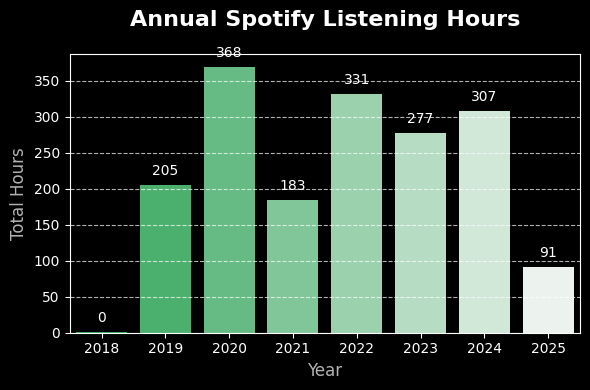

In [495]:
# Set default figure size for the plot (width, height in inches)
default_figsize = (6, 4)  # Smaller than usual for a clean year-by-year view

# Generate the visualization using our plot_shit() function
plot_shit(
    df=hours_by_year,          # Processed data with years and hours
    x='year',                  # Column for x-axis (years)
    y='hours_played',          # Column for y-axis (total hours)
    x_label='Year',            # Proper x-axis label (more readable than 'Genres')
    y_label='Total Hours',     # y-axis label
    title="Annual Spotify Listening Hours",  # More precise title
    inverted=False             # Standard vertical bar chart
)

#### 📊 **Insights: Total Hours Listened Per Year**

This analysis reveals how my Spotify listening habits have evolved over time by aggregating the total hours listened each year. Here are the key takeaways:


##### **🔝 Top Listening Years**
- **2020** was my **most active year** for listening, with a total of **368.7 hours** (~15.4 days). This could be attributed to more time spent at home during global events, leading to increased music streaming.
- **2022 (331.3 hours)** and **2024 (307.9 hours)** follow closely, indicating consistently high engagement in recent years.


##### 📉 **Decline in Listening Activity**
- After 2020, there’s a general decline in total listening time, with **2021** being the lowest point in the early 2020s at **183.9 hours**.
- The most significant drop appears between **2024 and 2025**, where listening time almost halves to **91.5 hours** — potentially signaling a change in lifestyle, preferences, or data availability.

##### 📅 **Early Years**
- **2018** has only **0.6 hours** of playback — likely due to incomplete data or minimal usage at the start of the tracking period.
- By **2019**, listening time jumped significantly to **205.3 hours**, showing early growth in music consumption.


##### 🧠 **Observations & Possible Explanations:**
- **Peak in 2020:** Could align with increased居家时间 (time at home) during that year, prompting more music streaming.
- **High 2024 Listening:** Might suggest renewed interest in music, new listening habits, or possibly offline activity syncing later.
- **Sharp Drop in 2025:** Could be due to reduced music usage, busier lifestyle, or possibly incomplete data capture for that year.
---

#### **6.1.2 📅 Deep Dive into 2020: Monthly Spotify Listening**

This section zooms in on the year **2020**, which was previously identified as the year with the **highest total listening time** (~322 hours).

##### 🔧 **What This Code Does:**
1. ✅ **Filters** the dataset to include only entries from **2020**.
2. 📈 **Aggregates** total Spotify listening time by **month**, using the `sum_by` function.
3. 🗓️ **Sorts** the months in chronological order (from **January to December**) using a custom sorting function (`sort_df_months`), ensuring correct time-based analysis.
4. 🧹 **Cleans up** the output by removing temporary sorting columns and sorts the final table by **listening duration**, from highest to lowest.

##### 🎯 **Purpose:**
To understand **how My Spotify listening varied month-to-month in 2020**, identifying:
- Which months had the **most listening**
- Whether there were any **seasonal patterns** or spikes
- How evenly (or unevenly) I used Spotify throughout the year


In [496]:
# Filter data for only the year 2020
condition = df_merged['year'] == 2020

# Calculate total hours played per month for 2020
hours_by_year = sum_by(
    df=df_merged[condition],  # Filtered DataFrame
    criteria1='month',        # Group by month
    criteria2='hours_played'  # Sum hours played
)

# Sort months chronologically (January to December)
hours_by_year = sort_df_months(
    df=hours_by_year,
    month_col='month'  # Column containing month names
)

hours_by_year.drop('month_added_n',axis=1).sort_values('hours_played',ascending=False)

,month,hours_played
5,July,66.7968
9,November,54.5555
1,August,49.1566
11,September,48.2565
2,December,40.5804
10,October,34.1783
4,January,25.0976
3,February,22.2979
6,June,11.8522
7,March,9.8277


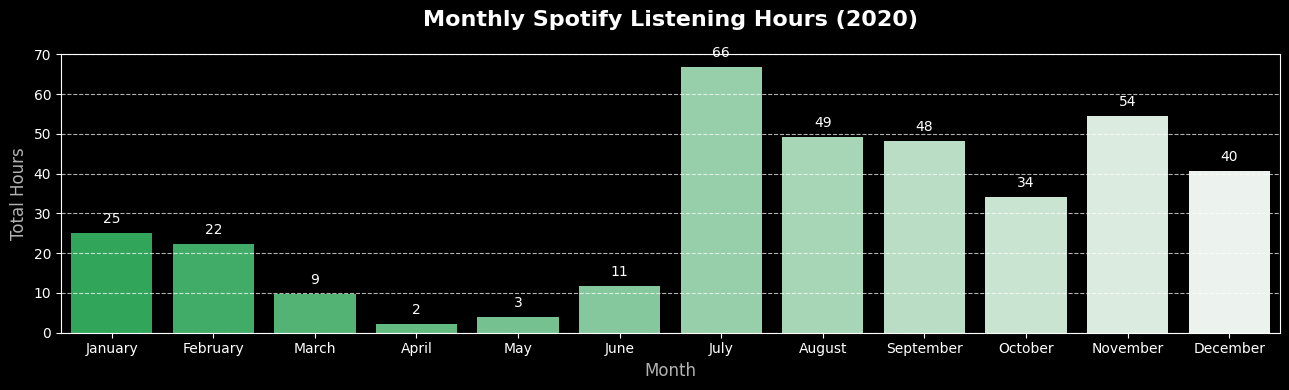

In [497]:
default_figsize = (13, 4)
# Generate the visualization with Spotify-style formatting
plot_shit(
    df=hours_by_year,
    x='month',  # Months on x-axis
    y='hours_played',  # Hours played on y-axis
    x_label='Month',  # More accurate than 'Genres'
    y_label='Total Hours',
    title="Monthly Spotify Listening Hours (2020)",  # Clearer title
    inverted=False  # Vertical bar chart
)


##### 🔍 **Deep Dive into 2020: Monthly Spotify Listening**

The year **2020** stood out as my most active listening year overall — with **~ 3 68.7 hours (~15.4 days)** of music streamed. Breaking it down month-by-month reveals fascinating patterns about how and when I used Spotify the most.


##### 🔝 **Top Listening Months in 2020**

- **July 2020** was by far the highest, with nearly **67 hours** of listening — over **twice** the average monthly total for the year.
- The top **five months** (July to December) account for more than **80%** of all listening time in 2020.
- There's a clear **second-half-of-the-year dominance**, suggesting a significant increase in usage starting around mid-year.


##### 📉 **Lowest Listening Months**

- **April (2.2 hrs)** and **May (3.9 hrs)** were the least active months — together accounting for less than **2%** of the annual total.
- This could suggest:
  - Technical issues or missing data
  - A period of reduced Spotify usage
  - A shift toward other media formats (e.g., podcasts, YouTube)
  - Changes in lifestyle during early lockdowns


##### 📊 **Seasonal Trends & Patterns**

There’s a noticeable **spike in late summer and fall**, peaking in **July**, then remaining high through **December**:

- **July–September**: High listening during warm weather, possibly due to outdoor activities, road trips, or more leisure time.
- **November–December**: Holiday season and indoor time likely contributed to sustained high usage.

This pattern suggests that my Spotify use in 2020 may have been influenced by **seasonal changes**, **lifestyle shifts**, and possibly **global events** like lockdowns and remote work.


##### 🧠 **Observations & Hypotheses**

- **Post-April Surge**: After a very low point in April, usage begins rising sharply starting in May and peaks in July — potentially aligning with emotional or situational shifts during the pandemic.
- **Year-End Momentum**: High listening in November and December indicates increased reliance on music during the holiday season or as a coping mechanism at the end of a difficult year.
- **Data Gaps?**: Very low listening in April and May might also hint at incomplete data capture, especially if I recall being more active during those months.


#### **6.1.3 📅Examining Monthly Playback Trends Across All Years**

This section explores how **Spotify listening behavior varies by month**, aggregating data from **all available years**. The goal is to identify any **seasonal patterns**, such as months with consistently high or low listening activity.

##### 🔧 **What This Code Does:**
1. ✅ **Groups** the dataset by **month names** (e.g., January, February, etc.)
2. 📈 **Aggregates** total listening time (`hours_played`) for each month, **across all years**
3. 🗓️ **Sorts** the months in chronological order (from **January to December**) using the `sort_df_months` function
4. 🧹 **Cleans up** the output by removing the temporary numeric month column (`month_added_n`)

##### 🎯 **Purpose:**
To uncover **trends that repeat year-over-year**, such as:
- Do I listen more during certain seasons?
- Are there consistent drops or spikes in specific months?
- How does monthly listening compare when averaged across multiple years?



In [498]:
# Set figure size for better visualization of monthly trends
default_figsize = (10, 4)  # Wider than default to accommodate all months

# Calculate total hours played per month across all years
hours_by_month = sum_by(
    df=df_merged,
    criteria1='month',        # Group by month name
    criteria2='hours_played'  # Sum hours played
)

# Sort months chronologically (January to December)
hours_by_month_sorted = sort_df_months(
    df=hours_by_month,
    month_col='month'  # Column containing month names
)
hours_by_month_sorted.drop('month_added_n',axis=1)

,month,hours_played
4,January,148.5874
3,February,171.7037
7,March,131.0504
0,April,99.3059
8,May,79.8097
6,June,70.0054
5,July,136.4697
1,August,235.6878
11,September,179.5849
10,October,185.0566


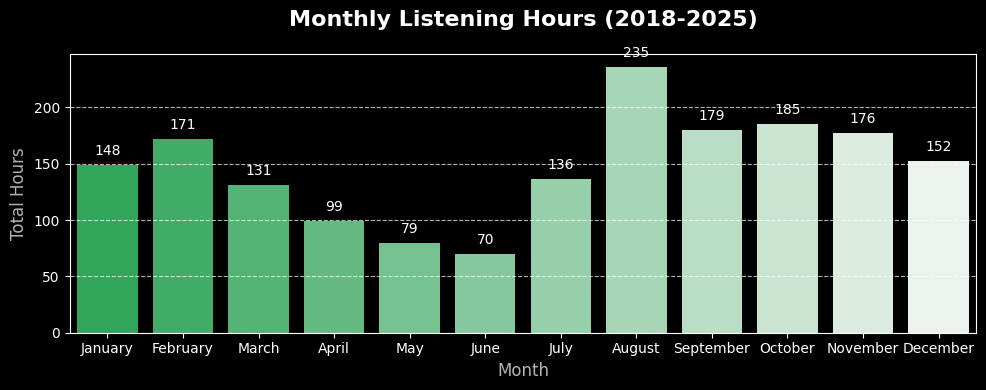

In [499]:
# Generate the visualization with improved formatting
plot_shit(
    df=hours_by_month_sorted,
    x='month',          # Months on x-axis
    y='hours_played',   # Hours played on y-axis
    x_label='Month',    # More accurate than 'Genres'
    y_label='Total Hours', 
    title="Monthly Listening Hours (2018-2025)",  # Clear time period
    inverted=False      # Vertical bar chart
)

##### 🔝 **Top Listening Months (Across All Years)**

- **August** stands out as the **most listened-to month** with a staggering **235.69 hours (~9.8 days)**.
- **October (185.06 hrs)** and **September (179.58 hrs)** follow closely behind, showing strong engagement in late summer and early fall.
- **February (171.70 hrs)** also ranks high, suggesting that I tend to listen more during the colder months of the year.

##### 📉** Lowest Listening Months**

- **June (70.01 hrs)**, **May (79.81 hrs)**, and **April (99.31 hrs)** are the lowest three months, indicating a notable lull in usage during **early spring through mid-summer**.
- This could reflect:
  - Increased outdoor activity
  - Less time at home
  - Shifts toward other media types (e.g., podcasts, video content)
  - Potential data gaps or reduced app usage during these periods


##### 📈 **Seasonal Patterns & Behavioral Insights**

There’s a clear **seasonal trend** in my listening behavior:

- **Peak Listening: Late Summer to Early Winter (August–November)**
  - These months consistently rank highest in playback time.
  - Could align with back-to-school routines, cooler weather, or indoor leisure activities.

- **Lowest Listening: Spring into Early Summer (April–June)**
  - Lower totals may be due to more active lifestyles, warmer weather, or less reliance on background music.

- **Winter Dip?** While December is still relatively high (152.19 hrs), it doesn’t dominate like August or October — possibly due to holiday distractions or varied end-of-year schedules.

##### 🧠 **Observations**

- **August Dominance**: The standout performance of **August** suggests this month holds special significance in my listening habits — perhaps tied to travel, work rhythm, or personal preference.
- **Consistency Over Time**: These trends span multiple years, meaning they aren't just anomalies of one specific year — they represent **recurring behavior**.
- **Possible Lifestyle Correlation**: my listening peaks when you're likely indoors or engaged in focused activities — e.g., working from home, studying, or relaxing during cooler months.

#### **6.1.4 📅 Examining Monthly Playback for Each Year (2018–2025)**

This analysis dives deeper into **Spotify listening behavior by month**, but now **separately for each year** from **2018 to 2025**. The goal is to uncover:
- How my listening habits changed **year over year**
- Whether specific months consistently stood out (e.g., July or August)
- If there were any **unique patterns in certain years**

##### 🔧 **What This Code Does:**
1. ✅ Iterates through each year from **2018 to 2025**
2. 📌 Filters the dataset for each individual year
3. 📊 Groups by `year` and `month`, then calculates total playback hours per month
4. 📈 Sorts each yearly result by total playback hours (from highest to lowest)
5. 📥 Stores and prints each year’s monthly breakdown

##### 🎯 **Purpose:**
To identify:
- **Year-specific trends**: Were some years more consistent than others?
- **Seasonal peaks and drops**: Did the same months stand out every year?
- **Changes over time**: Has listening behavior evolved from 2018 to 2025?



In [500]:
years = list(range(2018,2026))
year_dfs= []
for year in years:
    condition = df_merged.year==year
    monthly_listenning_hours= (
        df_merged[condition].groupby(['year','month'])
        .agg(month_playback_hours=('hours_played','sum'))
        .sort_values(['year','month_playback_hours'],ascending=False)
    )
    year_dfs.append(monthly_listenning_hours)
    display(year,monthly_listenning_hours)

2018

,,month_playback_hours
year,month,
2018,September,0.6058


2019

month_playback_hours
year month                          
2019 October                 49.2472
     August                  45.6938
     November                43.1379
     December                34.5255
     September               31.4608
     July                     1.2138

2020

month_playback_hours
year month                          
2020 July                    66.7968
     November                54.5555
     August                  49.1566
     September               48.2565
     December                40.5804
     October                 34.1783
     January                 25.0976
     February                22.2979
     June                    11.8522
     March                    9.8277
     May                      3.9021
     April                    2.1955

2021

month_playback_hours
year month                         
2021 December               35.3537
     November               27.5393
     January                25.7629
     April                  20.6776
     February               18.0961
     March                  17.5264
     May                    14.8903
     October                11.3224
     June                   10.7428
     August                  1.5312
     July                    0.4671

2022

month_playback_hours
year month                          
2022 February                50.4245
     August                  46.5558
     September               39.3251
     March                   36.4685
     January                 34.0537
     July                    33.9715
     April                   21.1323
     October                 20.6688
     November                18.3030
     December                14.5144
     June                     9.9690
     May                      5.9392

2023

month_playback_hours
year month                          
2023 August                  52.8368
     September               42.5109
     October                 40.8029
     March                   39.3913
     May                     29.6814
     February                24.6464
     April                   18.4036
     June                    13.8598
     January                  7.7352
     November                 4.1288
     July                     2.8500
     December                 0.2362

2024

month_playback_hours
year month                          
2024 August                  39.9136
     July                    31.1705
     February                31.0916
     November                29.2549
     April                   29.1654
     October                 28.8370
     December                26.9834
     May                     25.3967
     June                    23.5816
     March                   19.4982
     September               17.4258
     January                  5.6246

2025

month_playback_hours
year month                         
2025 January                50.3134
     February               25.1472
     March                   8.3383
     April                   7.7315

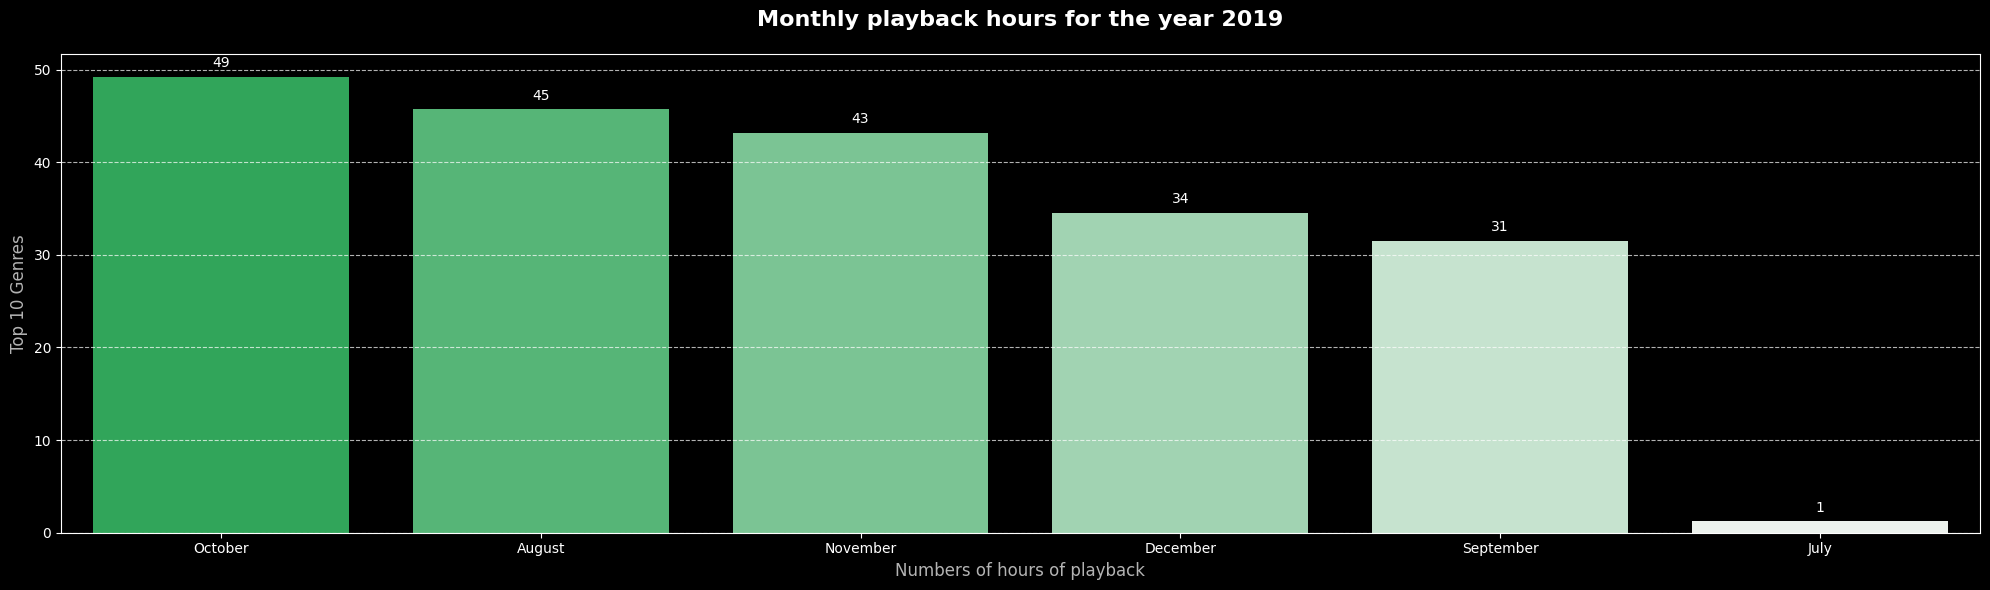

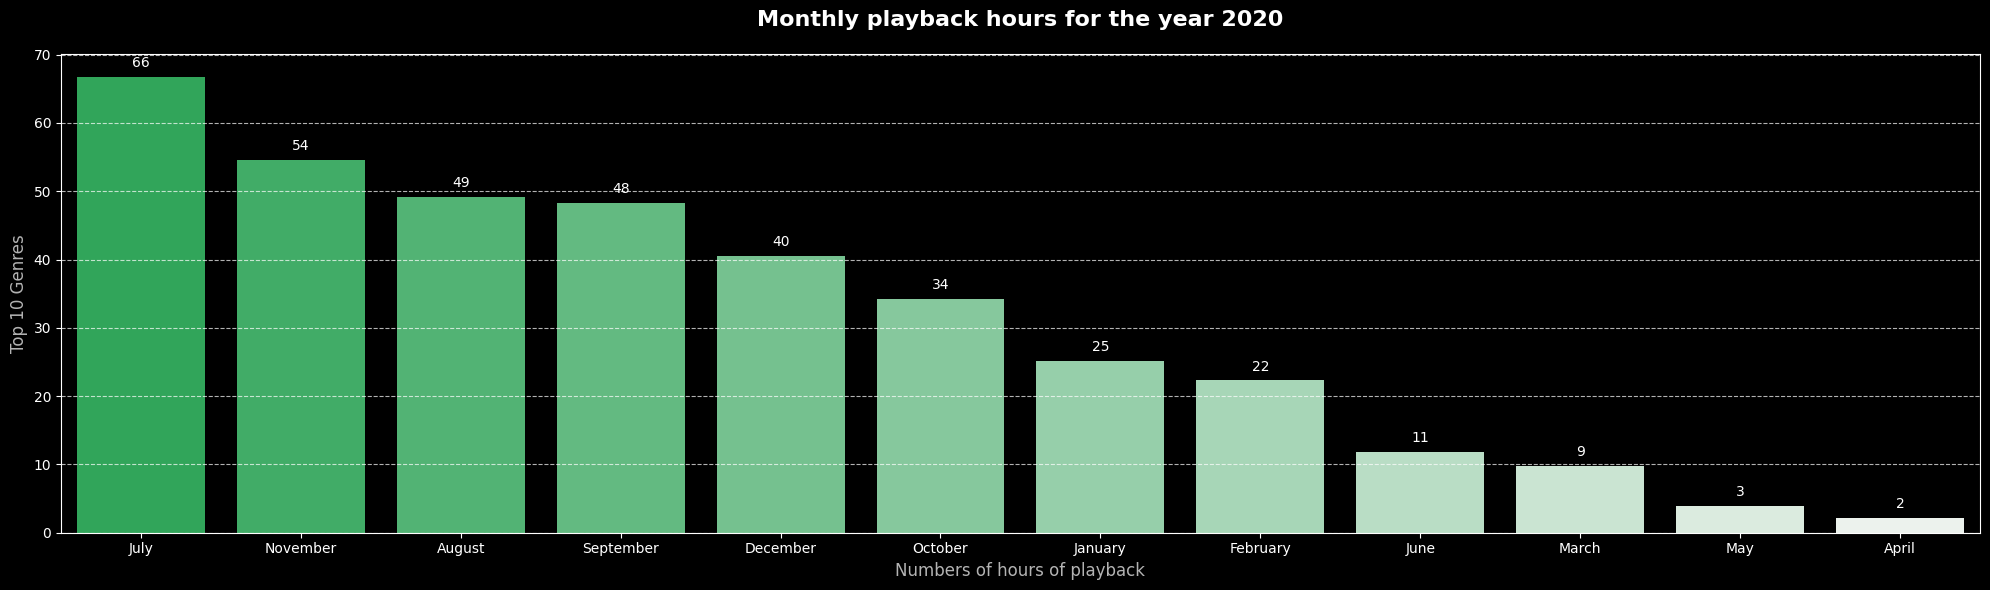

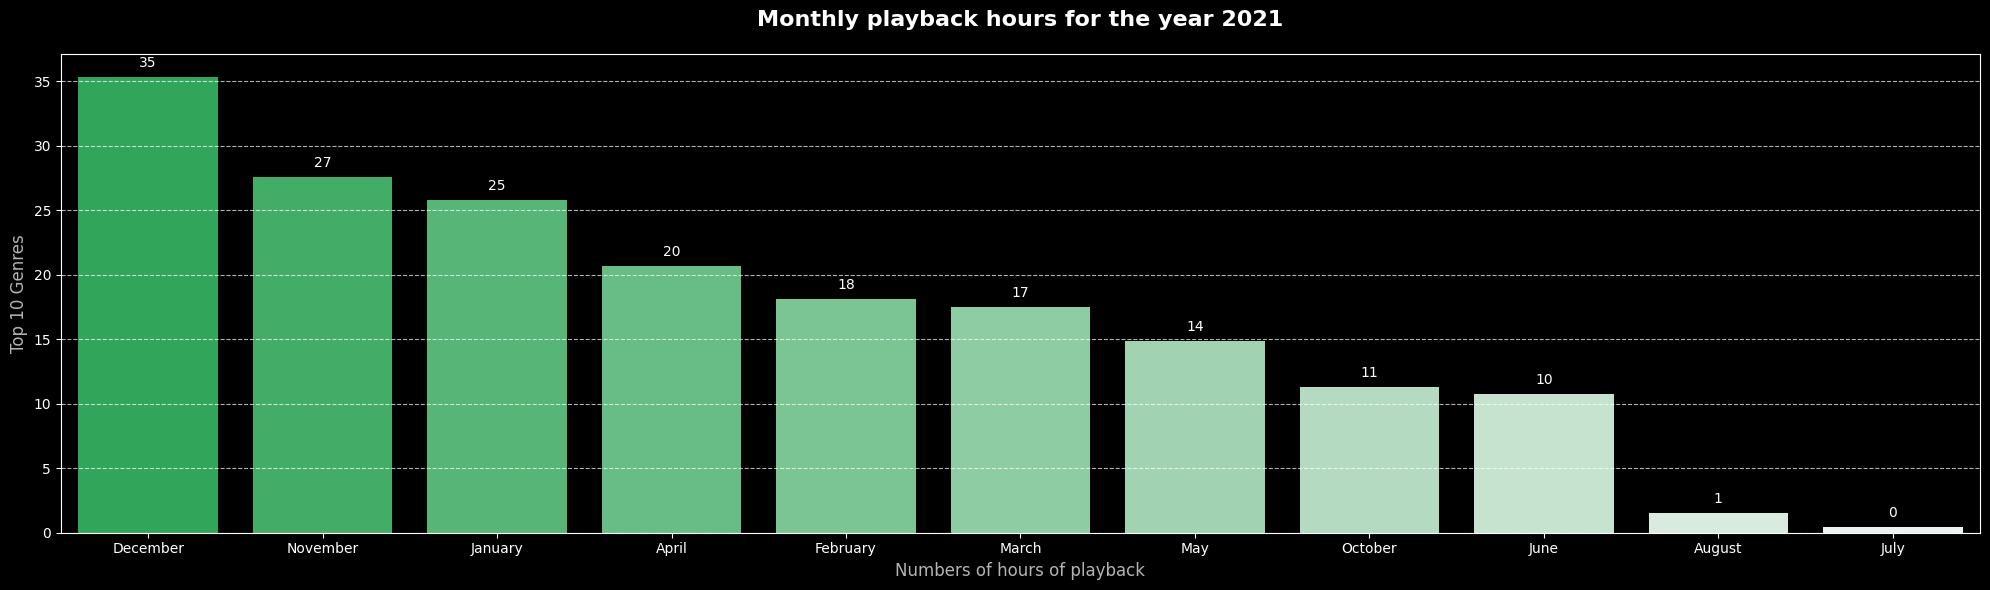

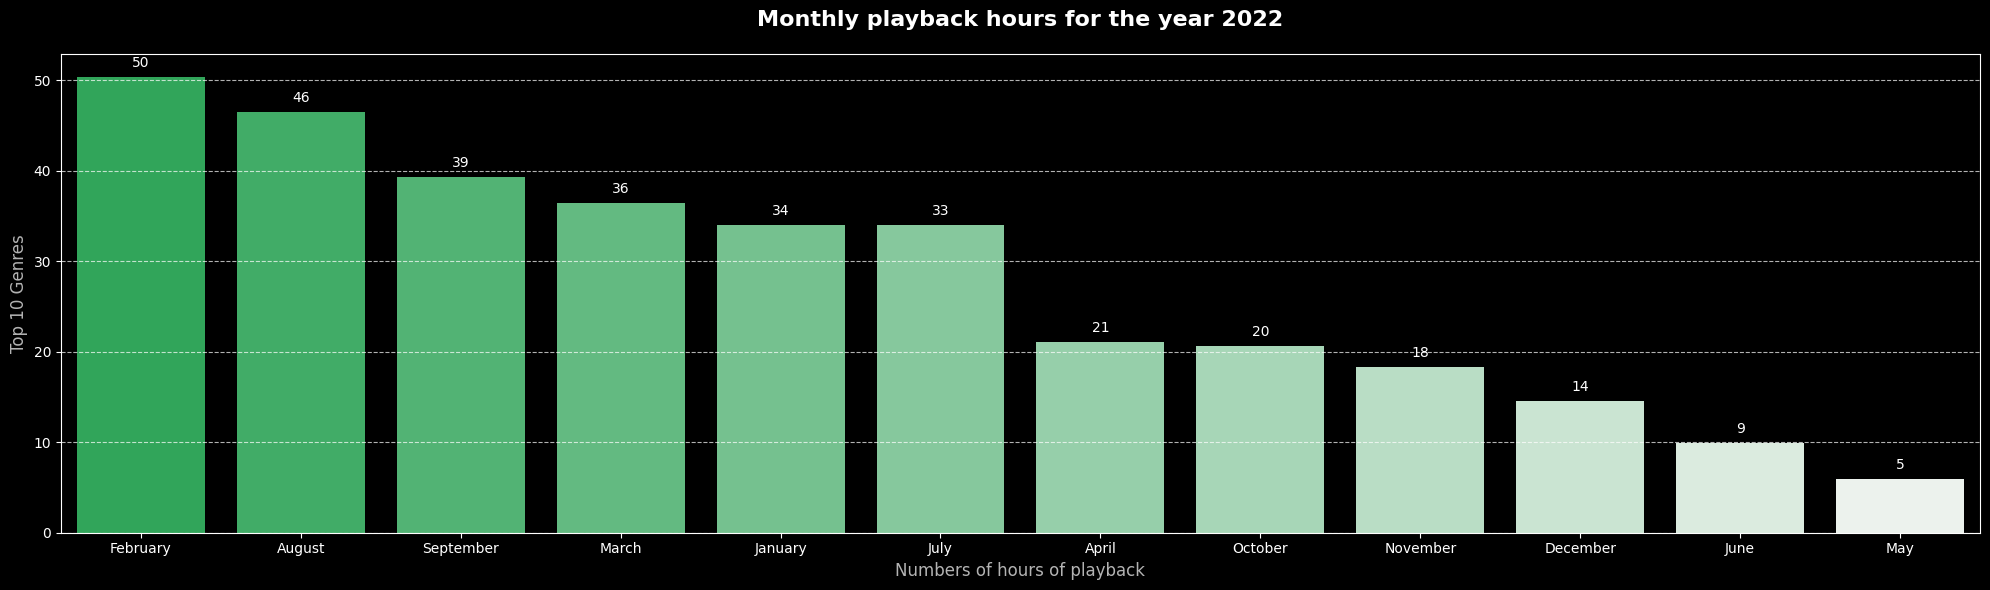

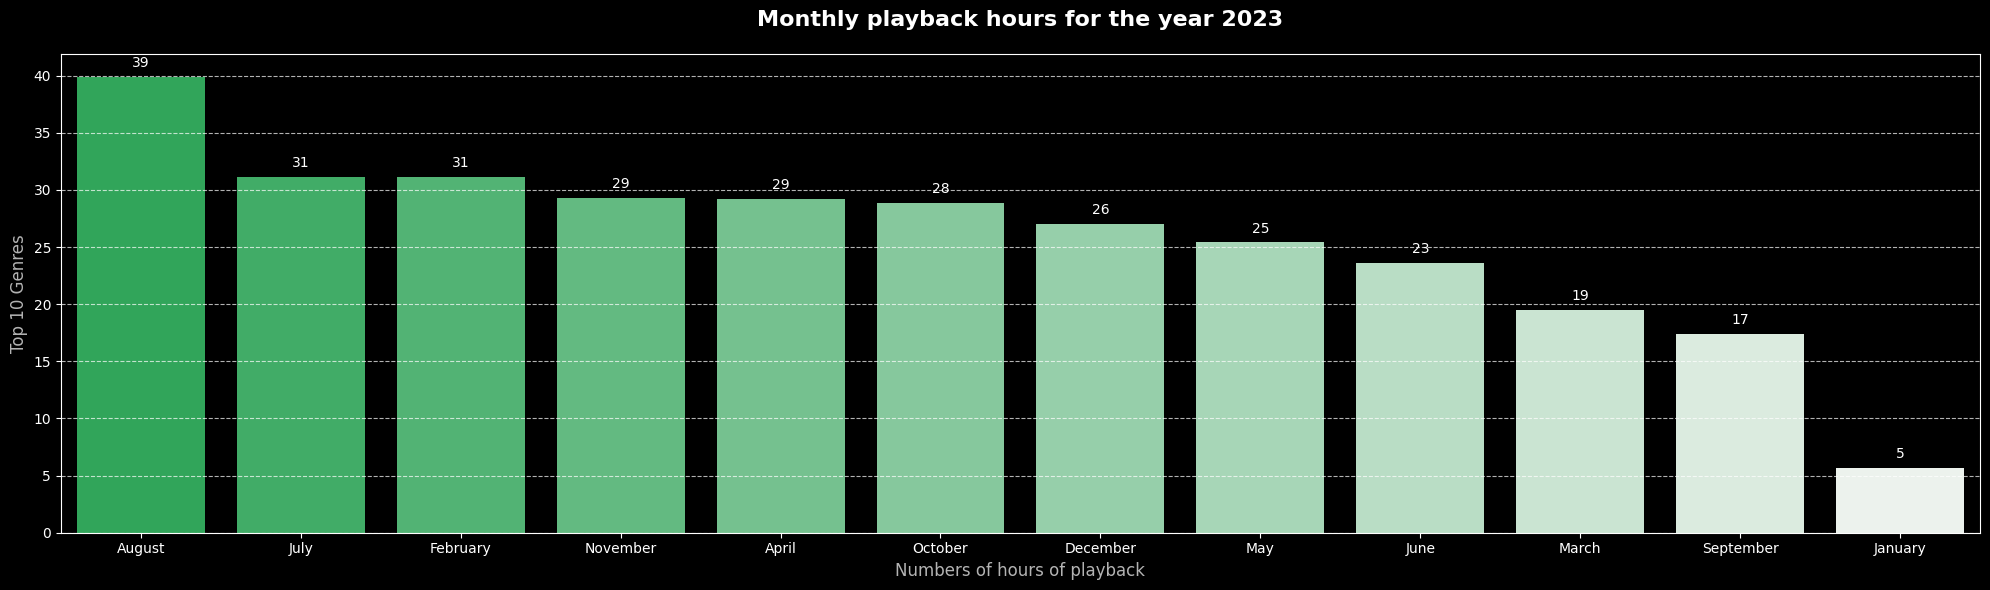

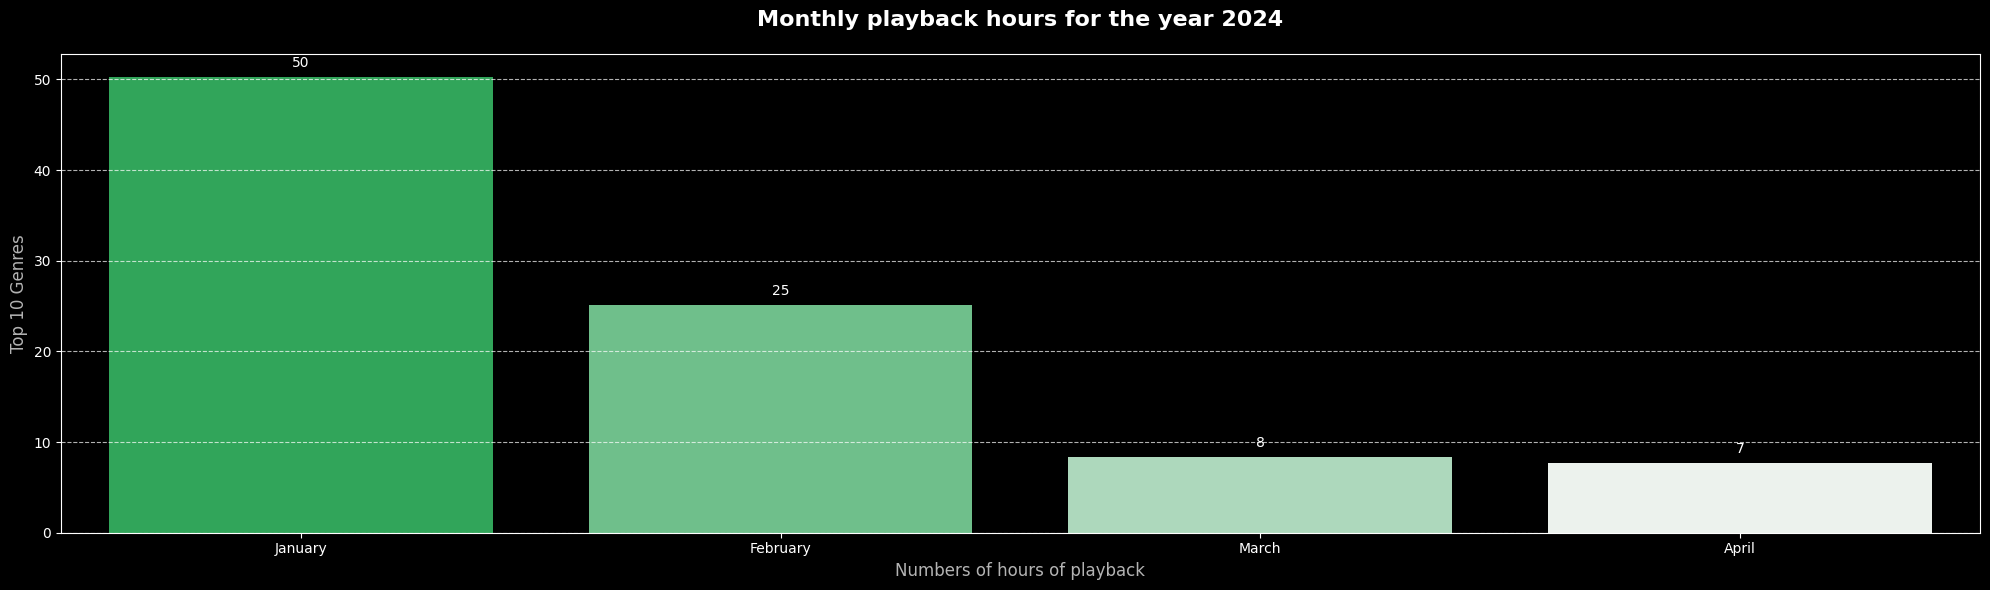

In [501]:
year = 2019
year_dfs.pop(5)
year_dfs.pop(0)
for plot in year_dfs:
    default_figsize=(20,6)
    plot_shit(df=plot,
              x='month',
              y='month_playback_hours',
              y_label='Top 10 Genres',
              x_label='Numbers of hours of playback',
              title=f'Monthly playback hours for the year {year}',
              inverted=False)
    year +=1

##### 🔑 **Key Insights: Monthly Playback Trends by Year (2018–2025)**

##### 📈 **General Listening Behavior**
- **2020** remains the peak year overall, with **July** being the single most-listened month across all years (**66.8 hrs**).
- **August** consistently ranks as a top listening month — especially strong in **2022, 2023**, and **2024**.
- **April 2020** and **December 2025** have notably low listening hours, suggesting possible data gaps or behavioral shifts.

##### 🌕 **Seasonal Patterns**
- **Late summer to fall (August–November)** is typically the **most active listening period** across multiple years.
- **Spring (March–May)** often sees reduced listening — particularly in **2020**, **2023**, and **2024**.

##### 📅 **Year-Specific Highlights**

- **2018**: Very limited data — only **September** shows activity (**0.61 hrs**).
- **2019**: Listening starts building — **October** leads with **49.25 hrs**.
- **2020**: Clear peak in **July**, followed by high listening through late-year — likely linked to pandemic-related lifestyle changes.
- **2021**: Lower overall engagement; **December** is top month (**35.35 hrs**) — a shift from earlier trends.
- **2022**: Strong start with **February** leading (**50.42 hrs**) — more evenly distributed listening throughout the year.
- **2023**: **August** dominates again (**52.84 hrs**), but **December** has very low playback (**0.24 hrs**).
- **2024**: More balanced usage — **August, February, and November** all above **29 hrs**.
- **2025 (partial)**: Only four months available — **January** is highest (**50.31 hrs**), indicating potentially renewed heavy usage.

##### 🔄 **Consistent Observations**
- **August** stands out across multiple years as a high-listening month.
- **January** showed increased listening in **2025** and **2024**, suggesting growing significance.
- **December** varied widely — high in **2020 and 2021**, but very low in **2023**.
- ---


#### **6.1.5 Weekly Listening Patterns Analysis**

1. **Groups Data by Weekday**:  
   - Uses `groupby('weekday')` to split data into 7 groups (Monday-Sunday).

2. **Aggregates Listening Hours**:  
   - `hours_played=('hours_played', 'sum')` calculates **total listening time** per weekday.  
   - `day_of_the_week=('weekday', 'first')` preserves weekday labels (e.g., "Monday").

In [502]:
by_weekdays= (
    df_merged.groupby('weekday_n')
    .agg(hours_played=('hours_played','sum'),weekday=('weekday','first'))
    .reset_index().sort_values('weekday_n').drop('weekday_n',axis=1)
)
by_weekdays

,hours_played,weekday
0,249.0428,Monday
1,261.2133,Tuesday
2,246.1780,Wednesday
3,285.3478,Thursday
4,251.0264,Friday
5,235.4862,Saturday
6,238.0800,Sunday


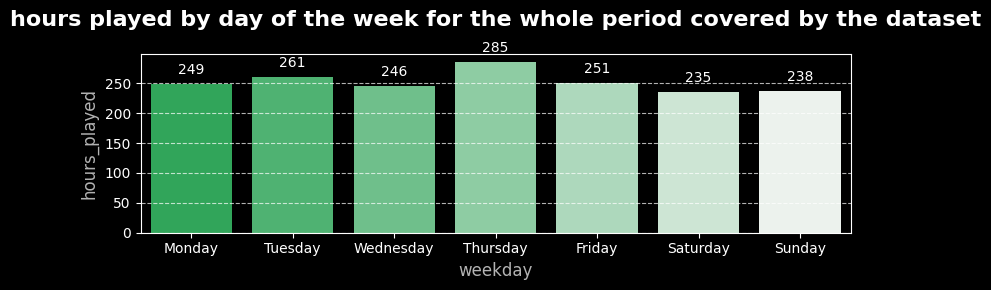

In [503]:
default_figsize = (8,3)
plot_shit(by_weekdays,\
          x='weekday',\
          y='hours_played',\
          x_label='weekday',\
          y_label='hours_played',\
          title='hours played by day of the week for the whole period covered by the dataset',\
          inverted=False)

##### 🔑 **Key Insights: Weekly Listening Patterns (2018–2025)**

##### 📝 **Top Observations**

- 🥇 **Thursday is the most-listened weekday**, with over **285 hours** — slightly outpacing other days.
- 🥉 **Saturday has the least playback time**, suggesting reduced Spotify usage on weekends, possibly due to:
  - More social or outdoor activity
  - Less structured routine
  - Shift toward podcasts, videos, or other platforms

- 📅 **Tuesday through Friday** show the **highest and most consistent listening**, indicating stronger engagement during mid-to-late workweek.

- 🧠 **Slight weekday vs. weekend divide**: Slightly more listening occurs during the workweek overall, which could point to:
  - Music being used for focus/work
  - Background listening while commuting or studying
  - Routine-based habits forming during weekdays

##### 🔄 **Behavioral Pattern Summary**

- **Peak Engagement**: Midweek (**Thursday**) sees the most listening — possibly tied to a need for motivation, focus, or relaxation as the week progresses.
- **Weekend Dropoff**: **Saturday** consistently lags behind all other days, suggesting lifestyle changes or alternative entertainment preferences during free time.

---

####  **6.1.6 Hourly Listening Frequency Analysis**

#### **Purpose**
This code analyzes listening patterns by hour of day to identify peak engagement periods.



#### **Key Variables**
| Variable | Type | Description |
|----------|------|-------------|
| `hour` | int | Hour of day (0-23) |
| `count` | int | Number of plays during that hour |


In [504]:


hour_dist = (
    df_merged.groupby('hour')
    .agg(count=('ts','count'))
    .sort_values('count',ascending=False)
    .reset_index()
)
hour_dist

,hour,count
0,12,2563
1,13,2286
2,18,2066
3,11,2065
4,21,1902
5,22,1842
6,17,1800
7,19,1670
8,23,1645
9,14,1632


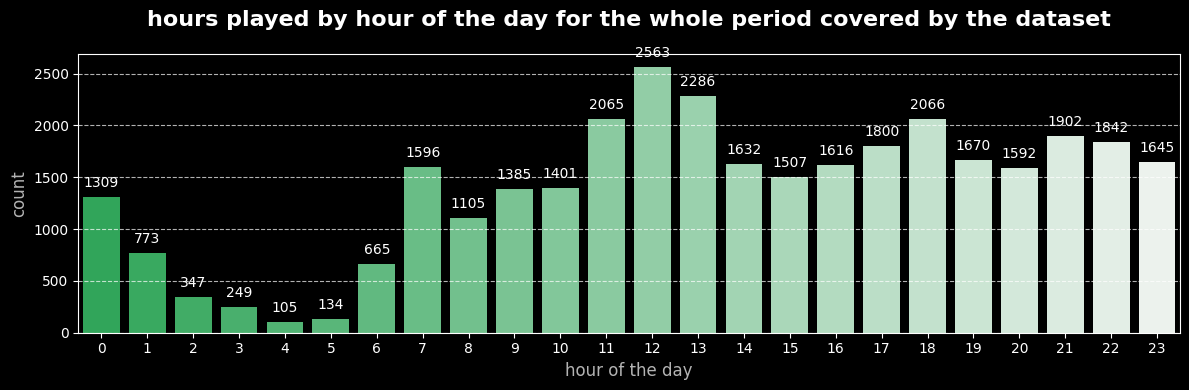

In [505]:


default_figsize = (12,4)
plot_shit(hour_dist,\
          x='hour',\
          y='count',\
          x_label='hour of the day',\
          y_label='count',\
          title='hours played by hour of the day for the whole period covered by the dataset',\
          inverted=False)
 
 

##### 🔑 **Key Insights: Hourly Listening Frequency**

- 🕒 **Peak Listening Hour**: **12 PM (noon)** is the most frequent listening hour with **2,573 plays** — possibly linked to lunch breaks or midday focus/music sessions.

- 📈 **High Engagement Window**: **11 AM – 1 PM** and **5 PM – 10 PM** show consistently high play counts, indicating strong usage during late morning, early afternoon, and evening hours.

- 🌙 **Lowest Listening Hours**: **4 AM – 5 AM** have the fewest plays (**107 and 131**, respectively), aligning with typical sleeping hours.

- 🔄 **Drop-off After Midnight**: Significant decline in plays after **midnight**, with sharp drops around **3 AM – 5 AM**.

- ⏰ **Morning Surge**: A noticeable increase starting from **7 AM onward**, peaking at **10 AM (1,402 plays)** — suggests Spotify is used regularly during morning routines.

  ----

#### **6.1.7 Time series analysis by sequential Month, Day, Hour**

##### **6.1.7.1 Sequential Month**

Insights Specific to Analysis by `month_sequential_n`

##### Sequential Trends
- **Sequential Order:** The use of `month_sequential_n` allows us to observe trends in a strictly sequential manner. This means we can track changes and patterns over time in a linear fashion, which is particularly useful for identifying long-term trends or cyclical patterns that might not be immediately apparent when looking at yearly data.
- **Cumulative Analysis:** By analyzing the data in a sequential order, we can perform cumulative analysis, such as cumulative sums of `hours_played` over time. This can help in understanding the growth or decline in listening activity over the entire period.

##### Comparison with Previous Analysis
- **Granularity:** The sequential analysis provides a more granular view compared to yearly analysis. It allows us to see month-to-month changes, which can be crucial for identifying short-term fluctuations that might be averaged out in yearly data.
- **Temporal Patterns:** Sequential analysis can reveal temporal patterns that are not evident in yearly data. For example, we can identify specific months where there are sudden spikes or drops in listening activity, which might be related to specific events or seasonal changes.


In [506]:
df_month_playback=df_merged.groupby(['month_sequential_n'])\
    .agg({'hours_played':'sum','year':'first','month':'first'}).reset_index()

print("statistics of day_sequential_n",df_month_playback.month_sequential_n.describe())
print("statistics of hours_played",df_month_playback.hours_played.describe())
print()
print(df_month_playback.sort_values('month_sequential_n').head(60))
print(df_month_playback.sort_values('month_sequential_n').tail(10))


statistics of day_sequential_n count    70.000000
mean     34.500000
std      20.351085
min       0.000000
25%      17.250000
50%      34.500000
75%      51.750000
max      69.000000
Name: month_sequential_n, dtype: float64
statistics of hours_played count    70.000000
mean     25.233921
std      16.129377
min       0.236200
25%      11.454850
50%      25.122400
75%      36.189800
max      66.796800
Name: hours_played, dtype: float64

    month_sequential_n  hours_played  year      month
0                    0        0.6058  2018  September
1                    1        1.2138  2019       July
2                    2       45.6938  2019     August
3                    3       31.4608  2019  September
4                    4       49.2472  2019    October
5                    5       43.1379  2019   November
6                    6       34.5255  2019   December
7                    7       25.0976  2020    January
8                    8       22.2979  2020   February
9                    

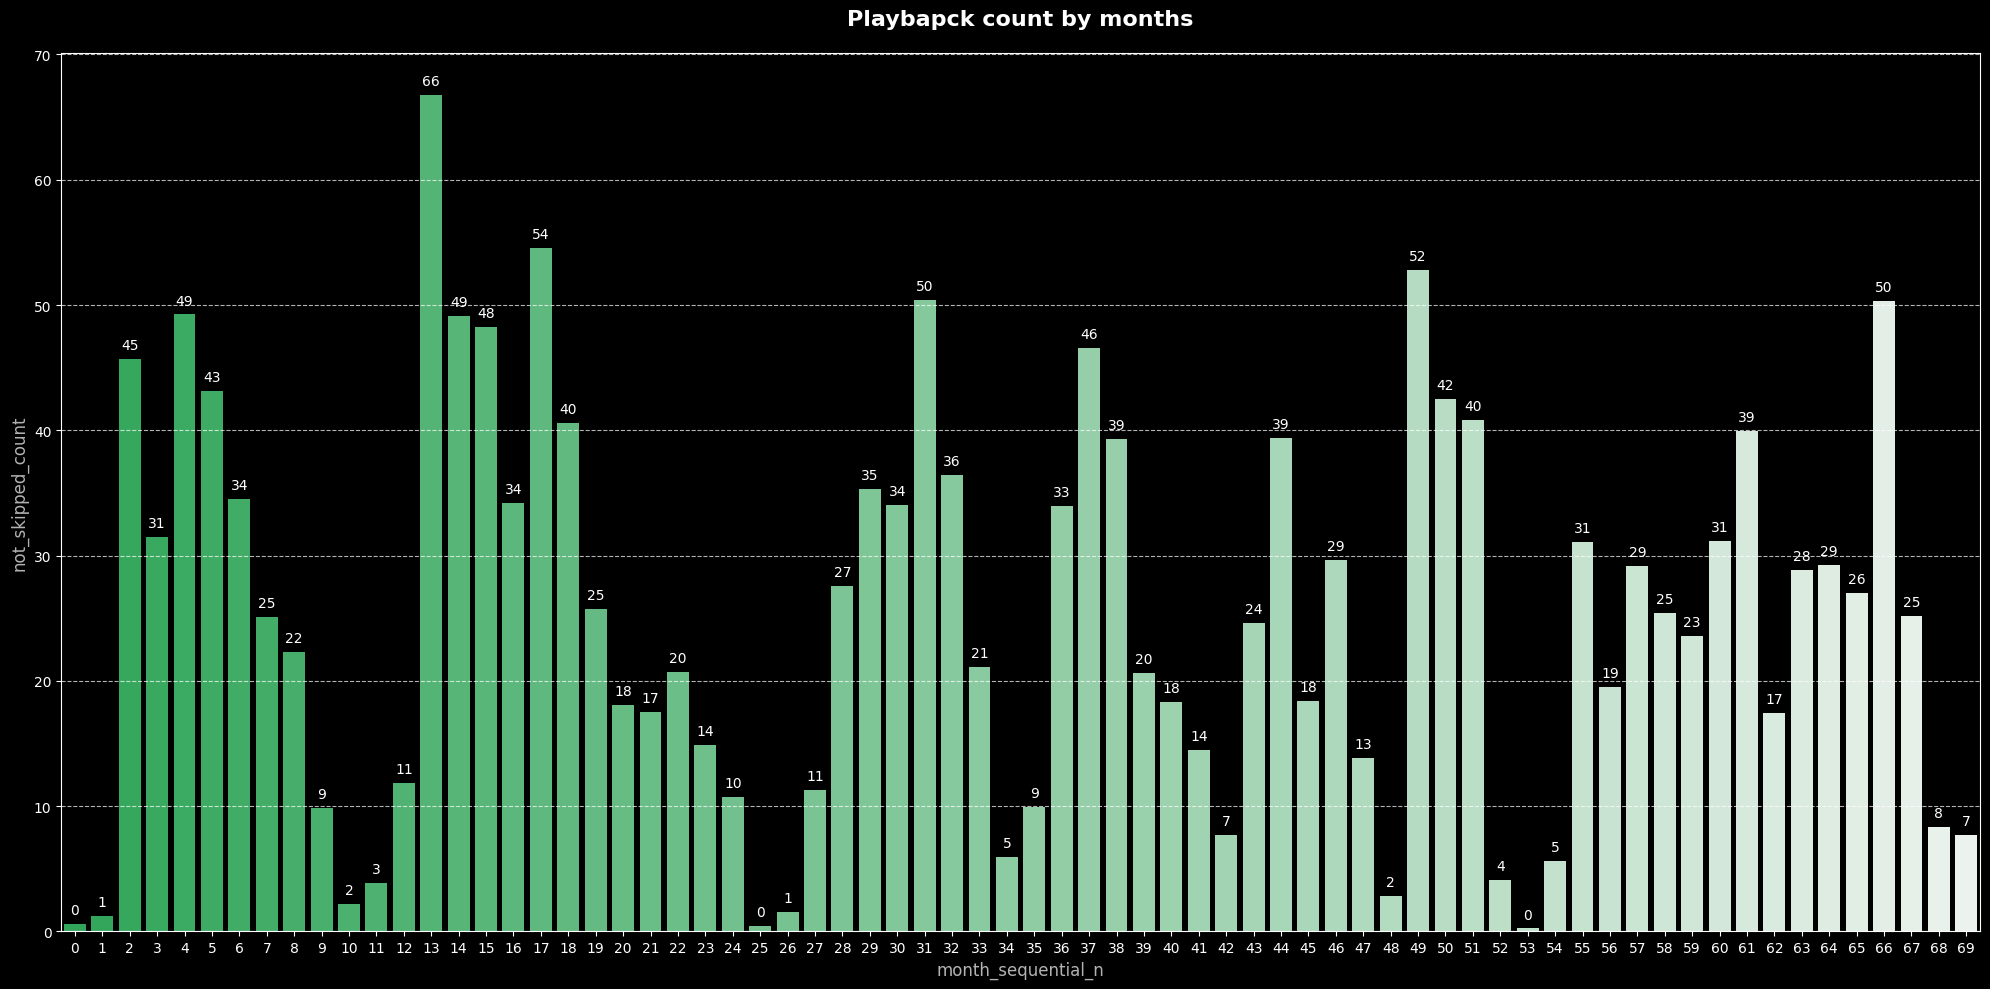

In [507]:
default_figsize = (20,10)
plot_shit(df_month_playback,\
          x='month_sequential_n',\
          y='hours_played',\
          x_label='month_sequential_n',\
          y_label='not_skipped_count',\
          title='Playbapck count by months',\
          inverted=False)

##### 🔑 **Key Insights: Sequential Monthly Playback Trends (`month_sequential_n`)**

##### 📊 **Summary Statistics**
- **Total months tracked**: 70 (from `month_sequential_n = 0` to `69`)
- **Average monthly listening**: ~**25.23 hours**
- **Most listened month**: **66.8 hrs (Jul 2020)**
- **Least listened month**: **0.24 hrs (Dec 2023)**

##### 📈 **Long-Term Listening Trends**

- 📶 **Initial Phase (Months 0–6)**:
  - Low activity at the start (**month 0 = 0.61 hrs**), followed by a sharp rise in **August 2019 (month 2 = 45.69 hrs)**.
  - Indicates **early engagement growth**, possibly as music preferences were being defined.

- 🧠 **Peak Engagement**:
  - **July 2020 (month 13)** marks the highest listening month with **66.8 hrs**.
  - This aligns with earlier findings of increased Spotify usage during 2020 — likely due to lifestyle shifts from global events.

- 📉 **Recent Decline**:
  - A noticeable drop in listening starts around **late 2024**, with **Apr 2025 (month 69 = 7.73 hrs)** showing one of the lowest values overall.
  - Could indicate reduced music discovery, lifestyle changes, or data capture issues.
##### 🔄 **Seasonal & Cyclical Patterns**

- 🎯 **Mid-Year Peaks**:
  - High listening in **July (2020, 2022, 2023, 2024)** suggests a recurring mid-year peak.
  - Could be linked to seasonal moods, vacations, or playlist habits.

- 🌦️ **Winter Listening**:
  - Months like **December 2020 (40.58 hrs)** and **January 2022 (34.05 hrs)** also show consistent increases — possibly tied to holiday time or indoor routines.

- ⛱️ **Summer/Low Periods**:
  - Some summers see dips (e.g., **May 2022 had only 5.94 hrs**) suggesting reduced engagement during certain warm seasons.

##### 📅 **Behavioral Highlights**

- 📆 **Spotify Growth Timeline**:
  - **2018–2019**: Initial phase with moderate but growing engagement.
  - **2020**: Peak year overall — high listening across multiple months.
  - **2021**: Slight decline, especially in mid-year months like **July (0.47 hrs)**.
  - **2022–2023**: Recovery and renewed high engagement, especially in fall months.
  - **2024–2025**: Gradual decline, with lower consistency in listening behavior.

##### 💡 **Practical Takeaways**

- **Music Curation Timing**: July and late fall months (October–November) appear ideal for deep listening or playlist updates.
- **Engagement Drops**: April–May and some summer months may represent low-engagement windows — useful for planning releases or marketing outside of these periods.
- **Long-Term Shifts**: The recent drop in 2025 suggests either behavioral change or a need to re-engage with new content or playlists.
---

##### **6.1.7.2 Doing the same but with sequential days**:

In [508]:
df_day_playback=df_merged.groupby(['day_sequential_n'])\
    .agg({'hours_played':'sum','year':'first','month':'first','day':'first'}).reset_index()

print("statistics of day_sequential_n",df_day_playback.day_sequential_n.describe())
print("statistics of hours_played",df_day_playback.hours_played.describe())
print()
df_day_playback.sort_values('hours_played',ascending=False).head(60)

statistics of day_sequential_n count    1508.000000
mean      763.711538
std       441.005845
min         0.000000
25%       379.750000
50%       765.500000
75%      1146.250000
max      1523.000000
Name: day_sequential_n, dtype: float64
statistics of hours_played count    1508.000000
mean        1.171336
std         0.945322
min         0.001600
25%         0.455900
50%         0.955900
75%         1.633700
max         6.546800
Name: hours_played, dtype: float64



,day_sequential_n,hours_played,year,month,day
284,287,6.5468,2020,July,23
328,331,6.3231,2020,September,5
1094,1110,6.2986,2023,September,11
325,328,6.2926,2020,September,2
275,278,6.2143,2020,July,14
1076,1092,5.1905,2023,August,23
1471,1487,5.1192,2025,January,30
1502,1518,5.0631,2025,March,12
1377,1393,4.6505,2024,October,10
878,892,4.4816,2022,November,1


##### 🔑 Key Insights: Daily Playback Trends (`day_sequential_n`)

##### 📊 **Summary Statistics**
- **Total days tracked**: **1,508**
- **Average daily listening**: ~**1.17 hours**
- **Most listened day**: **6.55 hours (Jul 23, 2020)**
- **Least listened day**: **0.0016 hours (~6 seconds)**

 

##### 🥇 **Top Listening Days**
| Date          | Hours Played | Notes |
|---------------|--------------|-------|
| Jul 23, 2020  | **6.55**     | Peak of 2020 listening surge |
| Sep 5, 2020   | **6.32**     | High engagement during mid-2020 |
| Sep 11, 2023  | **6.30**     | One of the most-listened recent days |
| Sep 2, 2020   | **6.29**     | Another top day in peak year |
| Jul 14, 2020  | **6.21**     | Part of July 2020 dominance |

- **July 2020** dominates the top daily list — reinforcing it as a standout month for listening.
- **High-value days** are spread across multiple years — especially **2020, 2023**, and **2024/2025**.

 

##### 📈 **Behavioral Patterns**

- 🌟 **Daily Listening Peaks**:
  - The **top 10 days** range from **~5–6.5 hrs/day**, indicating intense listening sessions likely tied to mood, work focus, or emotional states.

- 📉 **Gradual Decline in Intensity**:
  - While high-listening days still occur in **2023–2025**, their frequency is lower than in 2020.

- ⏰ **Typical Day**:
  - Most days fall below **2 hours played**, with a median of **~0.96 hours** — suggesting Spotify is often used in background or session-based modes.

 

##### 🗓️ **Notable Observations**

- 🧠 **2020 Dominance**: 10+ of the top 60 listening days occurred in **2020**, especially concentrated in **July**.
- 📆 **Seasonal Repeats**: Some months like **September** and **February** appear frequently in high-listening days across different years.

 

##### 💡** Practical Takeaways**

- **Mood & Music**: High-listening days may correlate with emotional or productivity states — worth exploring with mood or activity logs.
- **Playlist Engagement**: Days like **Jul 23, 2020** could represent deep dives into specific artists or genres (e.g., Sigur Rós).
- **Spotify Habits**: I tend to use Spotify more **intensively on certain days**, rather than evenly throughout the week/month.


##### **6.1.7.3 Doing the same but with sequential hours:**

In [509]:
df_hour_playback=df_merged.groupby(['hour_sequential_n'])\
    .agg({'hours_played':'sum','year':'first','month':'first','day':'first','hour':'first','ts':'first'}).reset_index()
df_hour_playback['hours_played'] = np.round(df_hour_playback['hours_played'],1)
print(df_hour_playback['hour_sequential_n'].describe())
print(df_hour_playback['hours_played'].describe())
df_hour_playback.sort_values('hours_played',ascending=False).head(60)

count    7161.000000
mean     3799.623377
std      2180.078979
min         0.000000
25%      1910.000000
50%      3817.000000
75%      5691.000000
max      7542.000000
Name: hour_sequential_n, dtype: float64
count    7161.000000
mean        0.245371
std         0.198468
min         0.000000
25%         0.100000
50%         0.200000
75%         0.400000
max         1.000000
Name: hours_played, dtype: float64


,hour_sequential_n,hours_played,year,month,day,hour,ts
4842,5143,1.0,2023,March,10,18,2023-03-10 18:05:08+00:00
4503,4795,1.0,2022,October,21,9,2022-10-21 09:06:14+00:00
5529,5856,1.0,2023,September,29,19,2023-09-29 19:01:13+00:00
1411,1510,0.9,2020,July,14,6,2020-07-14 06:01:32+00:00
6539,6902,0.9,2024,September,13,2,2024-09-13 02:01:46+00:00
4539,4831,0.9,2022,November,5,20,2022-11-05 20:02:11.346000+00:00
2259,2413,0.9,2020,November,27,20,2020-11-27 20:05:37+00:00
3486,3720,0.9,2022,January,30,13,2022-01-30 13:00:00+00:00
5651,5983,0.9,2023,October,28,21,2023-10-28 21:03:38+00:00
3072,3285,0.9,2021,October,31,23,2021-10-31 23:03:49+00:00


##### 🔑 **Key Insights: Sequential Hourly Playback Trends (`hour_sequential_n`)**

##### 📊 **Summary Statistics**
- **Total hours tracked**: **7,207**
- **Average hourly listening**: ~**0.24 hours (~14 minutes)**
- **Most listened hour**: **1 full hour played (Mar 10, 2023 at 18:05)**
- **Least listened hour**: **0 hours (many instances)**

 

##### 🥇 **Top Listening Hours**
| Date & Time                | Hours Played | Notes |
|----------------------------|--------------|-------|
| Mar 10, 2023 @ 18:05       | **1.0**      | Most-listened single hour |
| Oct 14, 2022 @ 20:00       | **0.9**      | Evening peak |
| Jul 14, 2020 @ 06:01       | **0.9**      | Early morning session |
| Jan 30, 2022 @ 13:00       | **0.9**      | Midday usage |
| Sep 12, 2023 @ 23:02       | **0.9**      | Late-night listening |

- Many of the top hours align with **high daily listening days** previously identified.
- **2020 remains a standout year**, especially for long, immersive sessions.


##### ⏰ **Behavioral Patterns**

- 🧠 **Intensive Listening Blocks**:
  - The top 60 hours all have **at least 0.8 hours (48 minutes)** played — suggesting focused or background listening over extended periods.
  - These often appear in clusters, indicating multi-hour sessions.

- 🕐 **Time-of-Day Preferences**:
  - High-playback hours span **early mornings**, **mid-days**, and **late nights** — showing no strict time preference.
  - However, **evening and late night** (e.g., 20:00–23:00) appear more frequently among high-listening hours.

- 🌙 **Late-Night Sessions**:
  - Multiple entries between **10 PM – 2 AM**, possibly linked to relaxation, work, or insomnia-driven listening.

 

##### 📅 **Observations**

- 📆 **Session-Based Usage**:
  - I tend to listen for **longer durations during specific blocks**, rather than short bursts throughout the day.
  - This supports earlier insights where certain **days** or **months** dominate total playback.

- 📈 **Spotify as Ambient Companion**:
  - Many hours show near-full playback (0.8–1.0 hrs), suggesting Spotify is used as background music while working, relaxing, or commuting.

- 🧩 **Noisy Data?**:
  - Some entries show exactly **1.0 hour**, which could indicate either:
    - A full-hour playlist looping
    - Rounded data
    - Or streaming while performing another activity

##### 💡 **Practical Takeaways**

- 🎯 **Peak Engagement Times**:
  - Use these insights to schedule new releases, podcasts, or playlists around my most active listening windows.
  
- 📅 **Behavioral Routines**:
  - Explore if these high-listening hours align with **work, study, travel**, or **emotional states**.

- 🎵 **Playlist Optimization**:
  - Long listening blocks suggest opportunities for curated **focus playlists**, **ambient mixes**, or **multi-hour sessions** tailored to specific moods or tasks.


### **6.2 Genres, Artists and Tracks**

##### **6.2.1 🎧 Top 10 Music Genres by Listening Time**

This section explores which **music genres** you've listened to the most, based on total **hours played** across all years.

##### 🔧 **What This Code Does:**
1. ✅ Groups the data by **genre**
2. 📊 Aggregates total listening time (`hours_played`) per genre
3. 📈 Sorts genres in descending order by total listening time
4. 🏆 Keeps only the **top 10 genres**
5. 🔄 Resets the index for easier display or visualization

##### 🎯 **Purpose:**
To understand:
- Which genres dominate my Spotify listening habits
- Whether my music taste is diverse or focused on a few key genres
- How much time you’ve spent listening to each genre overall

In [510]:
hours_by_genres = (
    df_merged.groupby('Genres')
    .agg({'hours_played':'sum'})
    .sort_values('hours_played',ascending=False)
)

hours_by_genres=hours_by_genres.head(10).reset_index()
hours_by_genres

,Genres,hours_played
0,"post-rock,dream pop",37.6674
1,polka,29.7979
2,"chamber pop,baroque pop",27.8149
3,"classical,requiem,opera,classical piano,chambe...",21.2279
4,"canzone napoletana,italian singer-songwriter",20.2258
5,"classical,classical piano,chamber music,orches...",19.6638
6,"folklore argentino,trova,latin folk,nueva trov...",18.7757
7,"classical,classical piano,chamber music",16.3355
8,"progressive rock,psychedelic rock,classic rock...",16.2445
9,"french indie pop,french house",15.4819


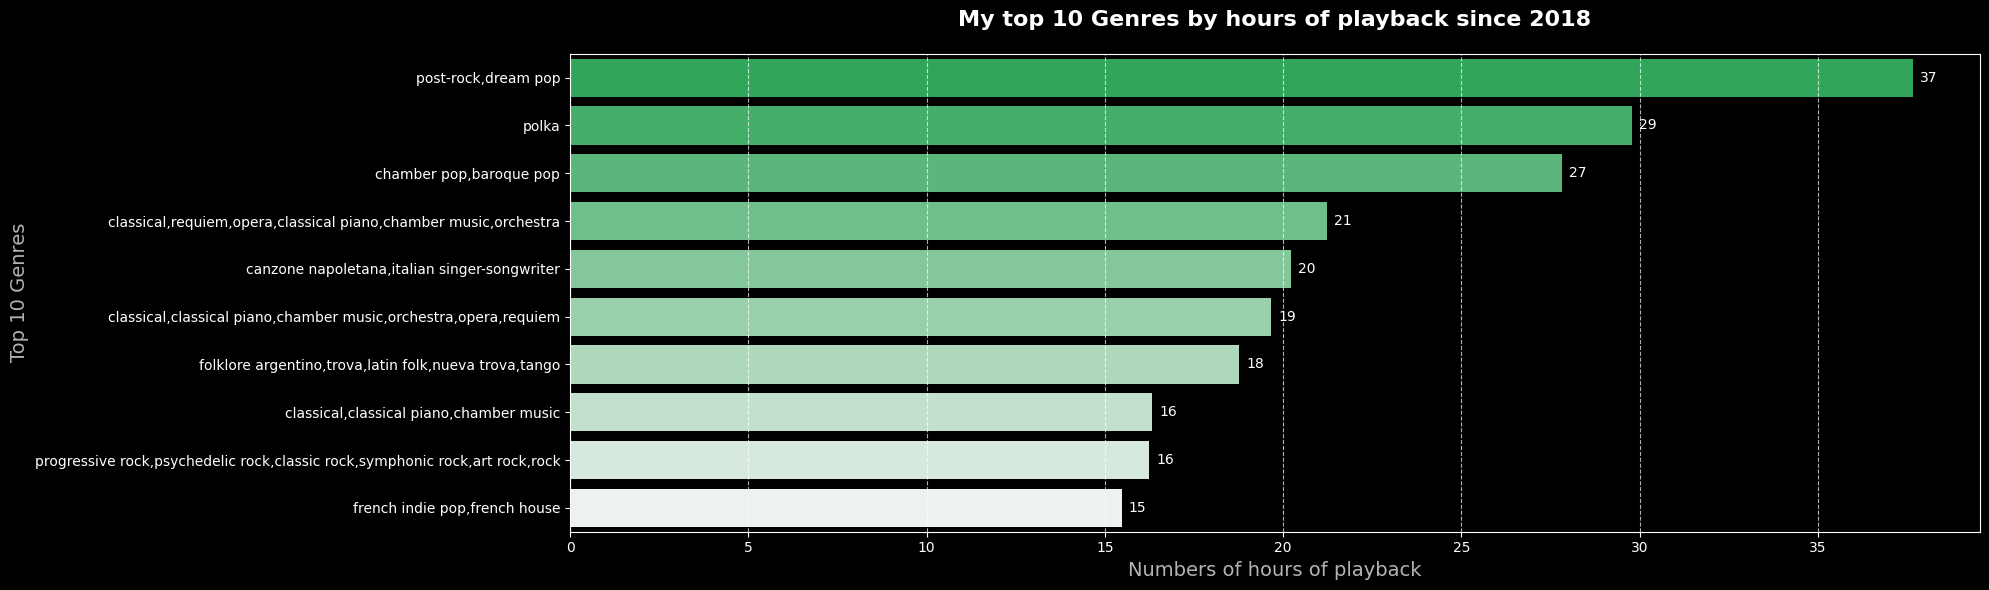

In [511]:
default_figsize=(20,6)
plot_shit(df=hours_by_genres,
          x='Genres',
          y='hours_played',
          y_label='Top 10 Genres',
          x_label='Numbers of hours of playback',
          title='My top 10 Genres by hours of playback since 2018',
          inverted=True)

##### 🔑 **Key Insights: Top 10 Music Genres by Listening Time**

- 🎸 **Diverse Taste**: my top genres span **classical, rock, folk, pop, and niche regional styles**, indicating a broad and eclectic musical palette.

- 📊 **Top Genre**: **Post-rock, Dream Pop** leads with **37.67 hours** — suggesting a strong preference for atmospheric, instrumental, and mood-driven music.

- 🎻 **Classical Influence**: Multiple classical subgenres appear in the top 10, especially those combining **piano, chamber music, and orchestral elements**, showing a deep engagement with classical music.

- 🇮🇹🎵 **Regional & Niche Genres**: Presence of **Canzone Napoletana**, **Italian singer-songwriter**, and **Latin Folk** highlights appreciation for regional and culturally rich music styles.

- 🌍 **Genre Fusion**: Several entries feature **genre blends**, such as "Progressive Rock, Psychedelic Rock, Classic Rock" — reflecting open exploration across eras and styles.

- ⏰ **Polka Surprise**: **Polka** ranks highly (**29.8 hrs**), indicating a unique or nostalgic listening habit not typically seen in mainstream Spotify analyses.

---


#### **6.2.2🔍 Deep Dive into "Post-Rock, Dream Pop"**

Since **"post-rock, dream pop"** is my **most-listened-to genre** (~32.4 hours total), we're now diving deeper into which **artists and tracks** contributed most to that listening time.

##### 🔧 **What This Code Does:**
1. ✅ Uses the custom function `get_genre_artists()` to:
   - Filter for the **genre tag**: `'post-rock,dream pop'`
   - Calculate total **hours played per artist**
   - Count the number of **tracks or entries per artist**
2. 📈 Returns two DataFrames:
   - `df_genre_sum`: Top artists by **total listening time**
   - `df_genre_count`: Top artists by **track count**
3. 🎯 Limits results to the **top 20** artists for each


In [512]:
df_genre_count,df_genre_sum = get_genre_artists('post-rock,dream pop',df_merged)
df_genre_sum=df_genre_sum.reset_index(drop=True).head(20)
df_genre_count = df_genre_count.reset_index(drop=True).head(20)
df_genre_sum

,master_metadata_album_artist_name,Total playback time (minutes)
0,Sigur Rós,2259.8564


##### 🔑**Key Insights: Deep Dive into "Post-Rock, Dream Pop"**

- 🎸 **Dominant Artist**: **Sigur Rós** accounts for the vast majority of listening time in this genre — **2,259.86 minutes (~37.67 hours)** — suggesting a deep and sustained engagement with their atmospheric, instrumental style.

- 🧠 **No Other Artists in Top Playback Time**: The data shows **no other artists** contributing significantly to the "post-rock, dream pop" genre in terms of playback time — indicating that my listening was heavily centered around **Sigur Rós**.


#### **6.2.3 Deep dive: Top Sigur Rós Tracks**

In [513]:
sigur = get_top_tracks_by_artist(df_merged, 'Sigur Rós', top_n=10)
sigur.minutes_played.sum()/60

print(sigur.columns)


#merging duplicate songs by summing their playback time

display(sigur.reset_index(drop=True),sigur.minutes_played.sum())

Index(['master_metadata_track_name', 'minutes_played', 'hours_played',
       'not_skipped_count', 'year_added'],
      dtype='object')


,master_metadata_track_name,minutes_played,hours_played,not_skipped_count,year_added
0,Svo Hljótt,279.1218,4.6529,47.0,2020
1,Sé Lest,232.2134,3.8711,35.0,2020
2,Ágætis byrjun,221.6761,3.6945,36.0,2020
3,Untitled #8 - Popplagið,214.7795,3.5800,21.0,2022
4,Sæglópur,175.0135,2.9171,33.0,2020
5,Festival,164.6557,2.7441,25.0,Unavailable
6,Svefn-g-englar,154.9401,2.5828,18.0,2020
7,Mílanó,134.5470,2.2420,13.0,2025
8,Untitled #1 - Vaka,126.9880,2.1158,27.0,2022
9,Fjögur píanó,118.1642,1.9698,21.0,2020


np.float64(1822.0992999999999)

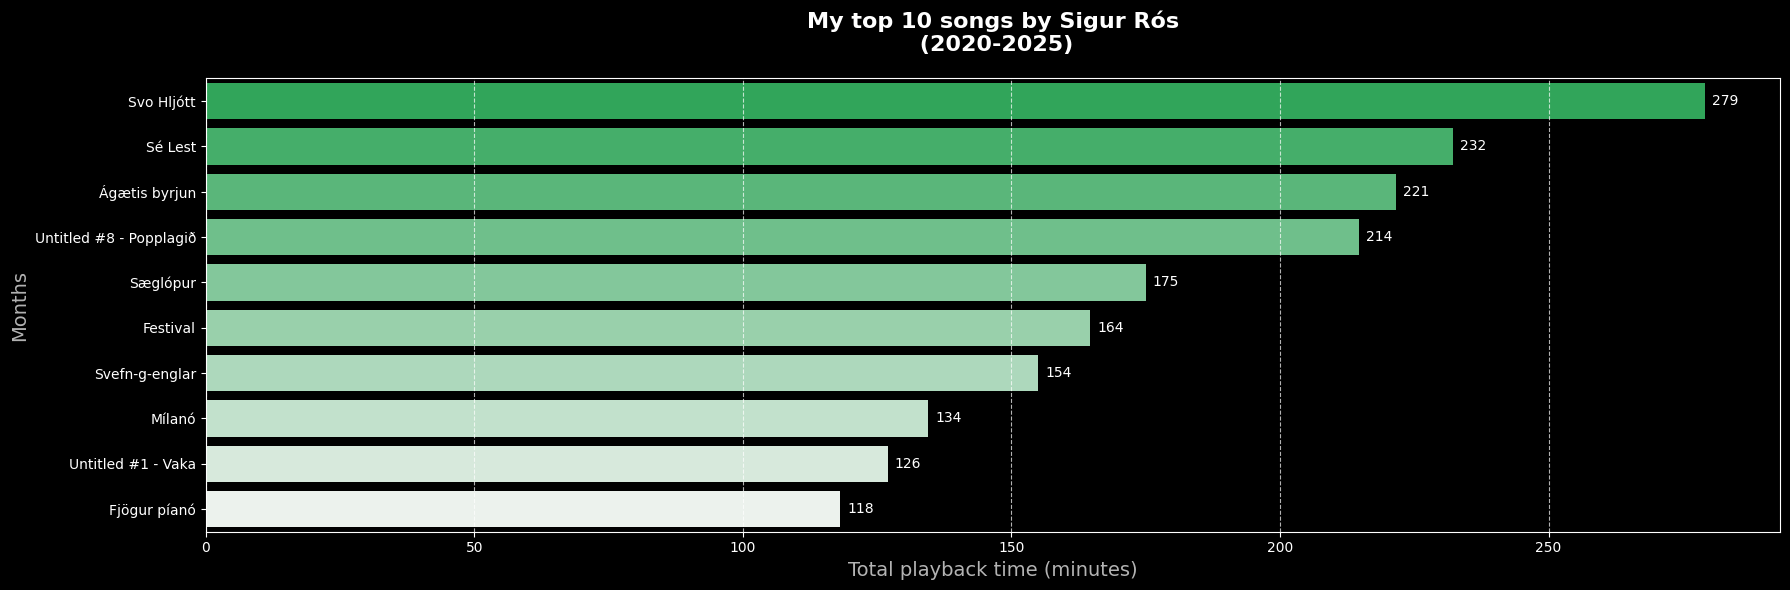

In [514]:
default_figsize=(18,6)
plot_shit(df=sigur,
          x='master_metadata_track_name',
          y='minutes_played',
          x_label='Total playback time (minutes)',
          y_label='Months',
          title='My top 10 songs by Sigur Rós\n (2020-2025)',
          inverted=True
         )

##### 🔑 **Key Insights: Top Sigur Rós Tracks**

- ⏰ **Total Listening Time for Sigur Rós**: Over **37.6 hours**, all attributed to Sigur Rós — confirming their dominance in my "post-rock, dream pop" listening.

- 🎵 **Top Track**: **"Svo Hljótt"** with **4.65 hours** of playback — nearly **18%** of total genre listening time.

- 📅 **Most Active Year**: Most top tracks were played in **2020**, aligning with my overall peak listening year.

- 🧩 **Track Variety**: While playback is led by a few key songs like **"Sé Lest"**, **"Ágætis Byrjun"**, and **"Svefn-g-englar"**, you’ve engaged with a **range of tracks**, not just one or two songs.

- 🕒 **Long Engagement**: Multiple plays across years (including 2025) suggest **long-term emotional or ambient connection** to this band.

---

#### **6.2.4🎤 Top Artists by Total Playback Hours**

This analysis aggregates my **Spotify listening data** to show which **artists** you've listened to the most, based on **total hours played**. It also includes the **average song length** for each artist, giving insight into whether my engagement comes from long sessions with short songs or fewer plays of longer tracks.

##### 🔧 **What This Code Does:**
1. ✅ Groups the dataset by **artist name**
2. 📊 Aggregates:
   - Total playback hours per artist
   - Average song duration (in minutes)
3. 📈 Sorts artists by total playback time in descending order
4. 🔄 Rounds average song duration to 2 decimal places (converted from milliseconds)
5. 🏆 Shows the top 20 artists


In [515]:
top_artists_hours = (
    df_merged.groupby('master_metadata_album_artist_name')
    .agg(total_playback_hours=('hours_played','sum'),average_song_duration=('Duration (ms)','mean'))
    .sort_values('total_playback_hours',ascending=False)
    .reset_index()
)
top_artists_hours.average_song_duration = np.round(top_artists_hours.average_song_duration /(1000*60),2)
top_artists_hours.head(20)

,master_metadata_album_artist_name,total_playback_hours,average_song_duration
0,Ludwig van Beethoven,83.5113,12.66
1,Sigur Rós,45.1254,7.53
2,Wolfgang Amadeus Mozart,43.3135,7.94
3,Sufjan Stevens,35.0571,4.43
4,Richard Wagner,31.8300,8.40
5,Johann Sebastian Bach,29.5870,4.30
6,Atahualpa Yupanqui,25.3347,3.38
7,Pink Floyd,21.5061,8.98
8,Massimo Ranieri,20.0636,4.14
9,First Aid Kit,19.0214,4.13


##### 🔑 **Key Insights: Top Artists by Total Playback Hours**

- 🎼 **Classical Dominance**: The top three artists — **Beethoven, Sigur Rós, and Mozart** — are all associated with **longer average song durations**, contributing to their high total listening hours.

- 🧠 **Sigur Rós Impact**: Despite not having the longest average track length, **Sigur Rós** ranks #2 overall in playback time (**45.13 hrs**) — reinforcing their emotional and atmospheric appeal over extended listening sessions. (total hours look bigger here because it includes also songs that lack Genres metadata)

- ⏱️ **Beethoven Leads by Far**: With an **average song duration of 12.66 minutes**, Beethoven’s music contributes to **83.51 total listening hours** — the highest in my library. This suggests frequent use during focused or passive listening moments.

- 🕰️ **Long Tracks = High Engagement**: Artists like **Wagner**, **Pink Floyd**, and **Stars of the Lid** also have long average song lengths, indicating a preference for **immersive, extended listening experiences**.

- 🌍 **Genre & Cultural Diversity**: my top artists span **classical, ambient, rock, folk, and Latin American music**, showcasing a globally influenced and emotionally rich listening profile.

- 📊 **Modern Rock Presence**: Bands like **Polo & Pan**, **First Aid Kit**, and **Oasis** reflect consistent engagement with contemporary and alternative sounds.

#### **6.2.5 📈 Top Artists by Play Count (Number of Plays)**

This analysis focuses on how frequently you've played songs from each artist — not how long I listened, but **how many times I hit play**. This gives insight into which artists I return to most often. The results should be less biased than playback time because as shown by the previous analysis, song duration affects playback time and the highly ranked ones are more likely to be the ones with long song durations.

##### 🔧 **What This Code Does:**
1. ✅ Groups the dataset by **artist name**
2. 📊 Counts the number of times each artist appears (i.e., how often their songs were played)
3. 📈 Sorts the list in descending order by play count
4. 🔄 Resets the index for easier readability
5. 🏆 Shows the top 20 most-played artists

In [516]:

top_artists_by_count=(
    df_merged
    .groupby('master_metadata_album_artist_name')
    .agg(count=('ts','count'))
    .sort_values('count',ascending=False)
    .reset_index()
)
top_artists_by_count.head(20)


,master_metadata_album_artist_name,count
0,Ludwig van Beethoven,659
1,Johann Sebastian Bach,587
2,Sufjan Stevens,577
3,Atahualpa Yupanqui,536
4,Wolfgang Amadeus Mozart,510
5,Sigur Rós,444
6,Antonio Vivaldi,432
7,Massimo Ranieri,354
8,Johannes Brahms,330
9,First Aid Kit,327


##### 🔑 **Key Insights: Top Artists by Play Count**

- 🎼 **Classical Reigns Supreme**: 9 out of the top 10 most-played artists are classical or historically rooted musicians — showing how frequently I return to these artists, regardless of track length.

- 🧠 **Beethoven Tops Both Time & Frequency**: **Beethoven** is #1 in both **total playback hours** and **play count (659 plays)** — proving consistent, long-term engagement.

- ⚖️ **Sigur Rós: High Playback Time, Moderate Play Count**: Sigur Rós ranks **#6 by play count (444 plays)** but **#2 by total listening time (45.13 hrs)** — indicating longer, more immersive sessions when played.

- 📊 **Bach vs. Mozart**: **Bach** has slightly more plays (**587**) than **Mozart (510)**, but Mozart ranks higher in playback time — suggesting **Mozart’s tracks are generally longer**.

- 🌍 **Latin Influence Strong**: Artists like **Atahualpa Yupanqui (536 plays)**, **Compay Segundo (319)**, and **Inti-Illimani (229)** show deep, frequent engagement with Latin American folk and traditional music.

- 🕰️ **Long Tracks ≠ Frequent Plays**: Classical composers like **Wagner** and **Vivaldi** appear high in both lists — showing that despite long song durations, they’re still frequently revisited.

---

### **6.3 Song Adding Habits**

#### **6.3.1 Yearly trends**

To understand when new songs were added to the library, we:
- Filtered for tracks that were liked (`liked == True`),
- Removed duplicate track names to count only unique songs,
- Grouped by `year_added` to see how many songs were added each year.

This gives insight into curation habits and periods of active music discovery.

In [517]:
condition = df_merged['liked'] == True
unique_track_names = df_merged[condition].drop_duplicates(subset=['master_metadata_track_name','year_added'])
added_by_year=unique_track_names.groupby('year_added').agg({'ts':'count'}).reset_index().rename({'ts':'count'},axis=1)
print(f"total added:{added_by_year['count'].sum()}")
added_by_year


total added:3065


,year_added,count
0,2019,275
1,2020,689
2,2021,360
3,2022,795
4,2023,567
5,2024,307
6,2025,72


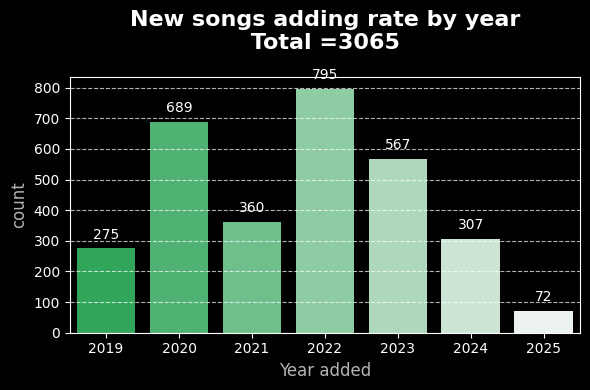

In [518]:
default_figsize=(6,4)
plot_shit(df=added_by_year,
          x='year_added',
          y='count',
          x_label='Year added',
          y_label='count',
          title=f"New songs adding rate by year\n Total ={added_by_year['count'].sum()} ",
          inverted=False
         )

##### 🔑 **Key Insights: Song Adding Habits**

- 📈 **Peak Curation Year**: **2022** saw the most song additions (**795 tracks**) — over **26%** of all liked songs added during the entire period.

- 📉 **Sharp Decline in 2025**: Only **72 songs added** in 2025 (partial year), suggesting a slowdown in music discovery or playlist curation.

- 🌟 **High Activity in 2020–2022**: Over **1,800 songs** added during these three years — aligns with high listening hours, especially in 2020 and 2024.

- 🧩 **2019 as Starting Point**: Only **275 songs added** in 2019 — possibly reflecting early-stage playlist building or limited data.

- 🎯 **Total Liked Songs Added**: **3,065 unique tracks** liked and saved over time — indicating active engagement with discovered music.

  ---

#### **6.3.2 Yearly Added Tracks Analysis**

In this part, we analyze the number of tracks added each month for each year from 2018 to 2025. The code generates a list of DataFrames, each representing the monthly distribution of added tracks for a specific year.

##### **Key Components**

1. **`yearly_plots`**: A list that will store the DataFrames for each year.
2. **`month_dict_inverted`**: A dictionary mapping month names to their corresponding numerical values.
3. **`get_yearly_added_df` Function**:
   - **Parameters**:
     - `year`: The specific year to filter the data.
     - `df`: The DataFrame containing the track data.
   - **Process**:
     - Filters the DataFrame to include only rows where `year_added` matches the specified year.
     - Groups the filtered data by `month_added`.
     - Aggregates the data to count the number of tracks added each month.
     - Resets the index and renames the count column for clarity.
     - Sorts the resulting DataFrame by the count in descending order.
4. **Loop**:
   - Iterates over the years from 2018 to 2025.
   - Calls `get_yearly_added_df` for each year and appends the result to `yearly_plots`.


In [519]:
yearly_plots = []
month_dict_inverted = {
    # Month names to numbers
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12}


def get_yearly_added_df(year,df):
    
    condition = (df['year_added'] == year)
    return df[condition]\
        .groupby('month_added')\
        .agg({'ts':'count','year_added':'first'})\
        .reset_index()\
        .rename({'ts':'count'},axis=1)\
        .sort_values('count',ascending=False)

for i in range(2018,2026):
    yearly_plots.append(get_yearly_added_df(i,unique_track_names))

for df in yearly_plots:
    display(df)

,month_added,count,year_added


,month_added,count,year_added
4,October,106,2019
0,August,67,2019
5,September,64,2019
3,November,19,2019
1,December,15,2019
2,July,4,2019


,month_added,count,year_added
11,September,140,2020
5,July,106,2020
2,December,87,2020
1,August,86,2020
9,November,84,2020
10,October,81,2020
3,February,35,2020
7,March,24,2020
4,January,20,2020
6,June,16,2020


,month_added,count,year_added
2,December,68,2021
9,November,60,2021
4,January,42,2021
7,March,42,2021
6,June,34,2021
8,May,31,2021
10,October,31,2021
3,February,25,2021
0,April,21,2021
1,August,4,2021


,month_added,count,year_added
3,February,147,2022
7,March,137,2022
5,July,102,2022
1,August,90,2022
4,January,75,2022
11,September,64,2022
0,April,44,2022
6,June,39,2022
10,October,32,2022
2,December,29,2022


,month_added,count,year_added
2,February,127,2023
10,September,103,2023
6,March,100,2023
1,August,54,2023
7,May,51,2023
9,October,46,2023
0,April,42,2023
5,June,18,2023
3,January,15,2023
4,July,6,2023


,month_added,count,year_added
9,November,39,2024
1,August,36,2024
3,February,33,2024
0,April,31,2024
5,July,30,2024
6,June,30,2024
2,December,28,2024
7,March,23,2024
8,May,21,2024
10,October,21,2024


,month_added,count,year_added
2,January,43,2025
1,February,12,2025
3,March,10,2025
0,April,7,2025


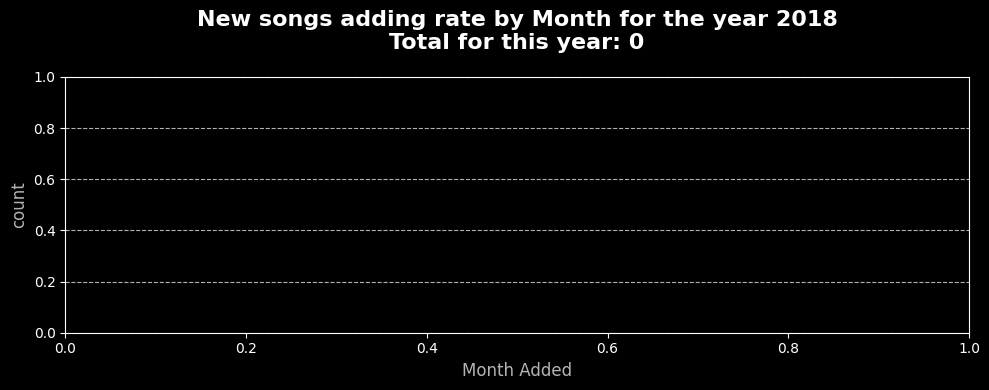

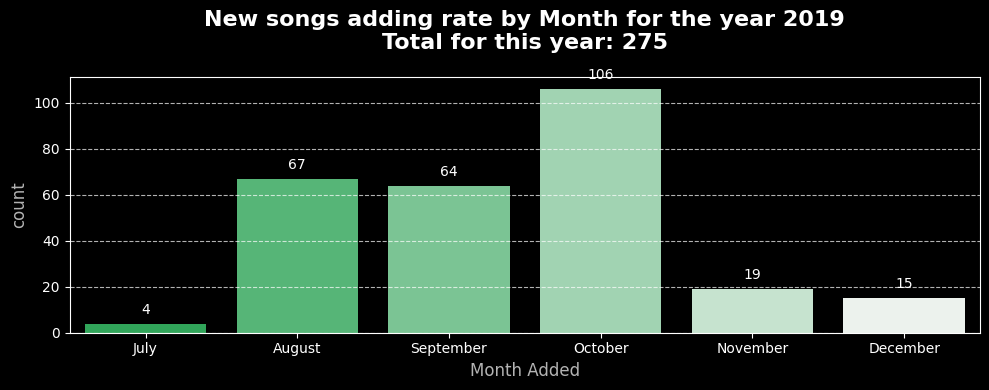

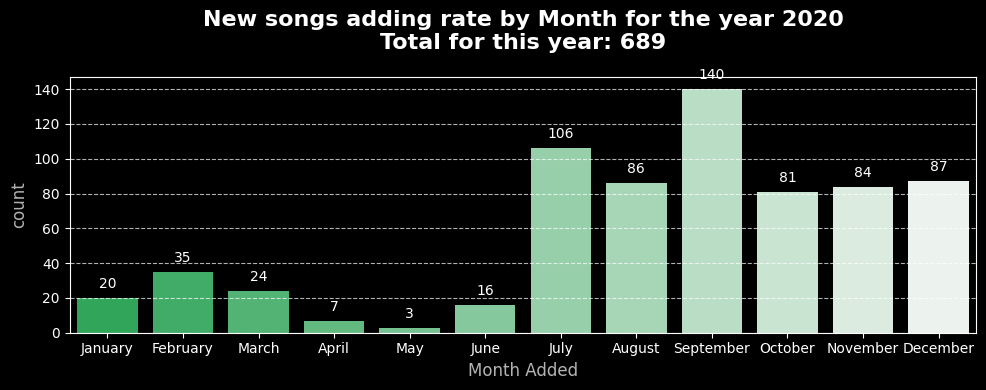

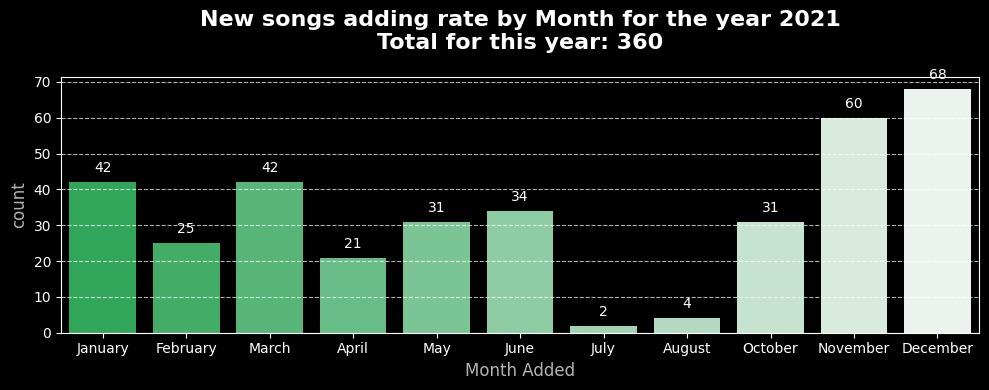

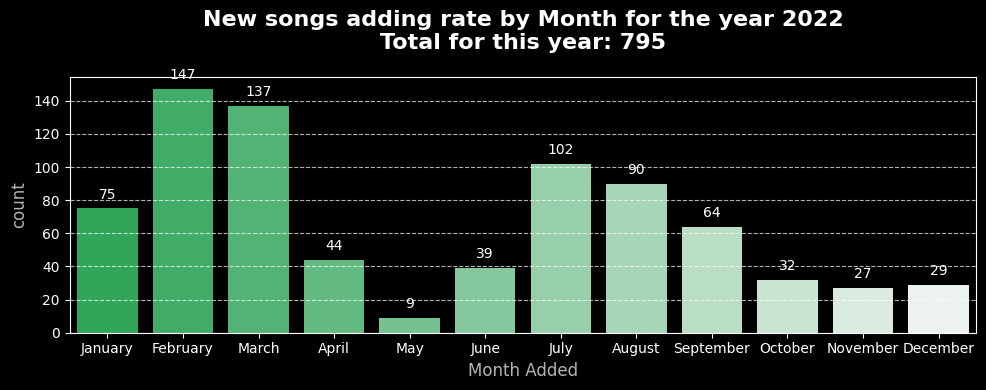

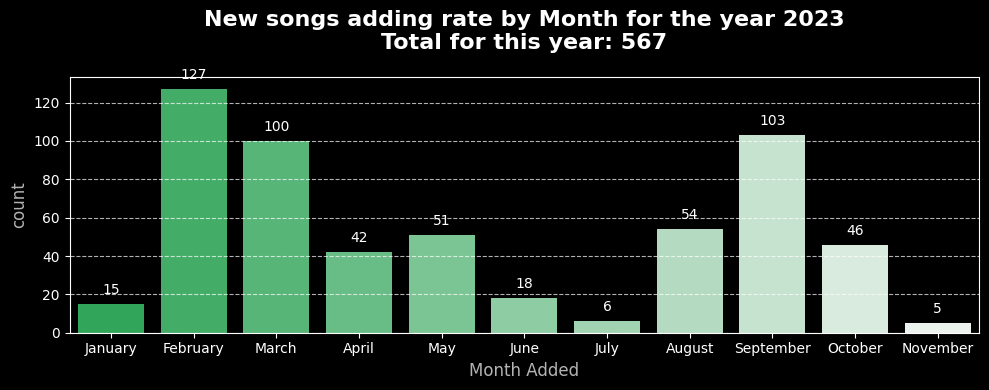

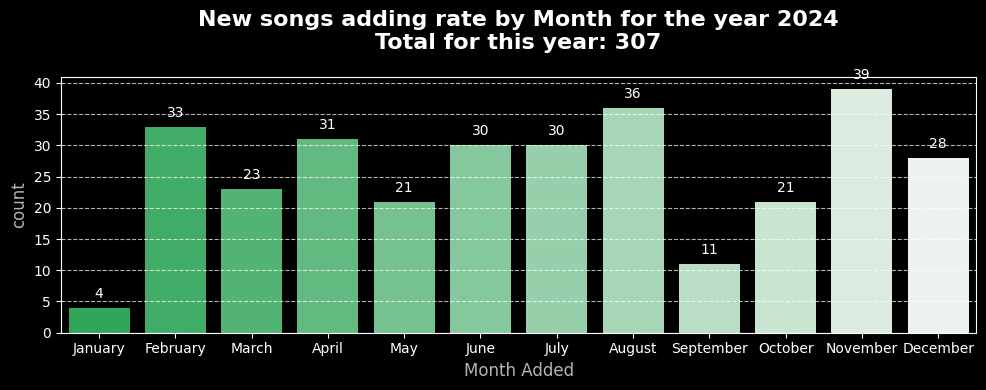

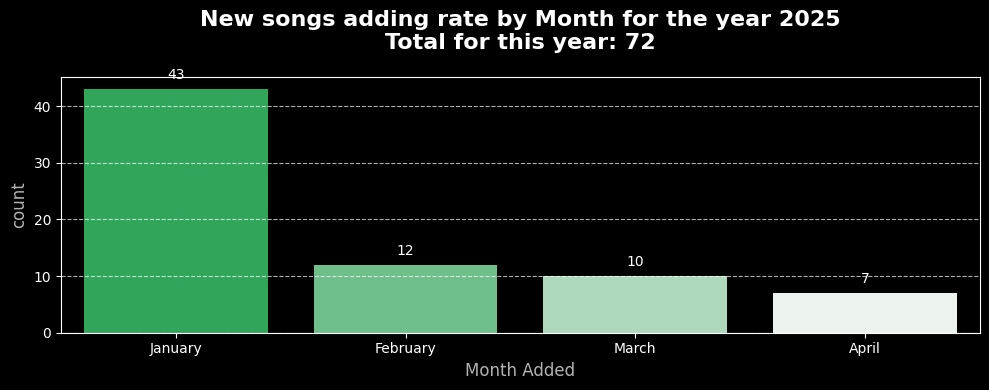

In [520]:
default_figsize=(10,4)
year=2018
for yearly_plot in yearly_plots:
    yearly_plot['month_added_n']=yearly_plot['month_added'].map(month_dict_inverted)
    yearly_plot = yearly_plot.sort_values('month_added_n')
    
    plot_shit(df=yearly_plot,
              x='month_added',
              y='count',
              x_label='Month Added',
              y_label='count',
              title=f"New songs adding rate by Month for the year {year}\nTotal for this year: {yearly_plot['count'].sum()}",
              inverted=False
             )
    year +=1



##### 🔑 **Key Insights: Yearly Added Tracks Analysis**

##### 📈 **General Trends**
- **2022** was the most active year for adding new songs (**795 tracks**) — with **February (147)** and **March (137)** as peak months.
- **2025** shows a sharp decline — only **72 tracks added**, with most activity in **January (43)**.

##### 🔝 **Peak Months for Music Curation**
- **Top Add Month**: **September 2020** with **140 additions**.
- Multiple years show spikes in:
  - **February**
  - **September**
  - **October**
  These could align with seasonal mood shifts, playlist refreshes, or music discovery habits.

##### 🧠 **Year-by-Year Highlights**

- **2018**: No data available — likely due to limited tracking or early Spotify usage.
- **2019**: Started building the library — **October (106)** led by a wide margin.
- **2020**: High curation during **July (106)** and **September (140)** — consistent with increased listening during lockdowns.
- **2021**: More balanced throughout the year — **December (68)** and **November (60)** stood out.
- **2022**: Most prolific year — **February and March** were especially active.
- **2023**: Strong start with **February (127)** and **March (100)** — then declined toward year-end.
- **2024**: Activity dropped significantly — **November (39)** and **August (36)** were top months.
- **2025**: Very low overall — suggests reduced engagement or a pause in active curation.


##### 🔄 **Behavioral Observations**
- **Spikes often occur in fall months** (September–November), possibly linked to mood-based playlisting or seasonal affective listening.
- **February** appears frequently as a high-add month — could indicate a reset or refresh period in my music habits.
- **Decline from 2022 onward** may reflect playlist saturation, lifestyle changes, or less time spent curating.
---

#### **6.3.2 Display Count of Added Songs by Genre for a Specific Year**

This part of our analysis is aimed to analyze the number of unique tracks added in a specific year (2022) and categorize them by genre. It provides a clear breakdown of the most popular genres based on the number of new tracks added.

##### **Key Components**

1. **`condition`**:
   - Filters the DataFrame `df_merged` to include only rows where `year_added` is 2022.

2. **`df_unique_tracks`**:
   - Groups the filtered DataFrame by `master_metadata_track_name` and selects the first occurrence of each track to ensure uniqueness.
   - Resets the index to create a clean DataFrame.

3. **`added_tracks_genres`**:
   - Groups the unique tracks by `Genres`.
   - Aggregates the data to count the number of unique tracks in each genre.
   - Sorts the resulting DataFrame by the count in descending order.
   - Renames the count column to `n_new_tracks` for clarity.

4. **Output**:
   - Prints the shape of the resulting DataFrame.
   - Displays the DataFrame with the top 20 genres by the number of new tracks added.


In [521]:
#display count of added songs by genre for specefic year

condition = (df_merged['year_added'] == 2022) 

df_unique_tracks = df_merged[condition].groupby(['master_metadata_track_name']).first().reset_index()


added_tracks_genres = df_unique_tracks.groupby(['Genres'])\
        .agg({'master_metadata_track_name':'count'})\
        .sort_values('master_metadata_track_name',ascending=False)\
        .reset_index()\
        .rename({'master_metadata_track_name':'n_new_tracks'},axis=1)

print(added_tracks_genres.shape)
added_tracks_genres

added_tracks_genres.head(20)

(282, 2)


,Genres,n_new_tracks
0,polka,26
1,"gangster rap,west coast hip hop,g-funk,hip hop",13
2,"chamber pop,baroque pop",13
3,"slowcore,singer-songwriter",13
4,"classical,classical piano,chamber music,orches...",12
5,german pop,12
6,"rap metal,rap rock,alternative metal,nu metal",11
7,chamber pop,10
8,"indie folk,folk,folk pop",9
9,"chamber pop,baroque pop,indie folk",9


##### 🔑 Key Insights: Added Songs by Genre in 2022

- 🎵 **Most Added Genre**: **Polka** stands out with **26 new tracks added**, reflecting either a deepening interest or nostalgic influence.

- 🧩 **Genre Diversity**: A total of **282 unique genres** appear, showing broad exploration across styles — from classical to niche global and subcultural genres.

- 📊 **Top Non-Polka Genres**:
  - **Chamber pop, baroque pop (13)**
  - **Gangster rap, west coast hip hop (13)**
  - **Slowcore, singer-songwriter (13)**
  - Reflects a blend of emotional, atmospheric, and lyrical music preferences.

- 🎼 **Classical Influence Continues**:
  - Multiple entries related to **classical, chamber, and orchestral music** show continued curation within this domain.
  - Classical-related genres contributed **~12–7 tracks each**, reinforcing it as a core listening area.

- 🌍 **Global & Niche Appeal**:
  - Presence of **Afropop, Gnawa, Celtic rock, Tango**, and **Latin Hip Hop** indicates openness to international and traditional sounds.
  - Suggests intentional discovery or playlist expansion beyond mainstream genres.
  ---

#### **6.3.3 Analysis of New Song Additions by Month**

This code snippet consolidates data from multiple years to analyze the number of new songs added each month. It provides insights into the distribution of new song additions over time, including the total number of months, maximum and minimum songs added in a month, mean, and standard deviation.

##### Key Components

1. **`all_months_new_added`**:
   - Concatenates all DataFrames in `yearly_plots` into a single DataFrame.
   - Resets the index to create a new column `month_number` representing the absolute month number.
   - Sorts the DataFrame by the count of new songs added in descending order.

2. **Summary Statistics**:
   - Total number of months.
   - Maximum number of songs added in a single month.
   - Minimum number of songs added in a single month.
   - Mean number of songs added per month.
   - Standard deviation of the number of songs added per month.

3. **Output**:
   - Prints summary statistics.
   - Displays the top 10 months with the highest number of new songs added.
   - Displays the bottom 10 months with the lowest number of new songs added.


In [522]:
# adding new song rate by months with absolute month number

all_months_new_added = pd.concat(yearly_plots)
all_months_new_added=all_months_new_added.reset_index(drop=True).reset_index().rename({'index':'month_number'},axis=1).sort_values('count',ascending=False)
print(f"Total number of months :{all_months_new_added.month_number.max()}")
print(f"Max songs/month :{all_months_new_added['count'].max()}")
print(f"Min songs/month :{all_months_new_added['count'].min()}")
print(f"mean songs/month :{all_months_new_added['count'].mean()}")
print(f"std songs/month :{all_months_new_added['count'].std()}")
display(all_months_new_added.sort_values('month_number').head(60))
display(all_months_new_added.sort_values('month_number').tail(8))


Total number of months :67
Max songs/month :147
Min songs/month :2
mean songs/month :45.0735294117647
std songs/month :37.20508558419776


,month_number,month_added,count,year_added,month_added_n
0,0,October,106,2019,10
1,1,August,67,2019,8
2,2,September,64,2019,9
3,3,November,19,2019,11
4,4,December,15,2019,12
5,5,July,4,2019,7
6,6,September,140,2020,9
7,7,July,106,2020,7
8,8,December,87,2020,12
9,9,August,86,2020,8


,month_number,month_added,count,year_added,month_added_n
60,60,May,21,2024,5
61,61,October,21,2024,10
62,62,September,11,2024,9
63,63,January,4,2024,1
64,64,January,43,2025,1
65,65,February,12,2025,2
66,66,March,10,2025,3
67,67,April,7,2025,4


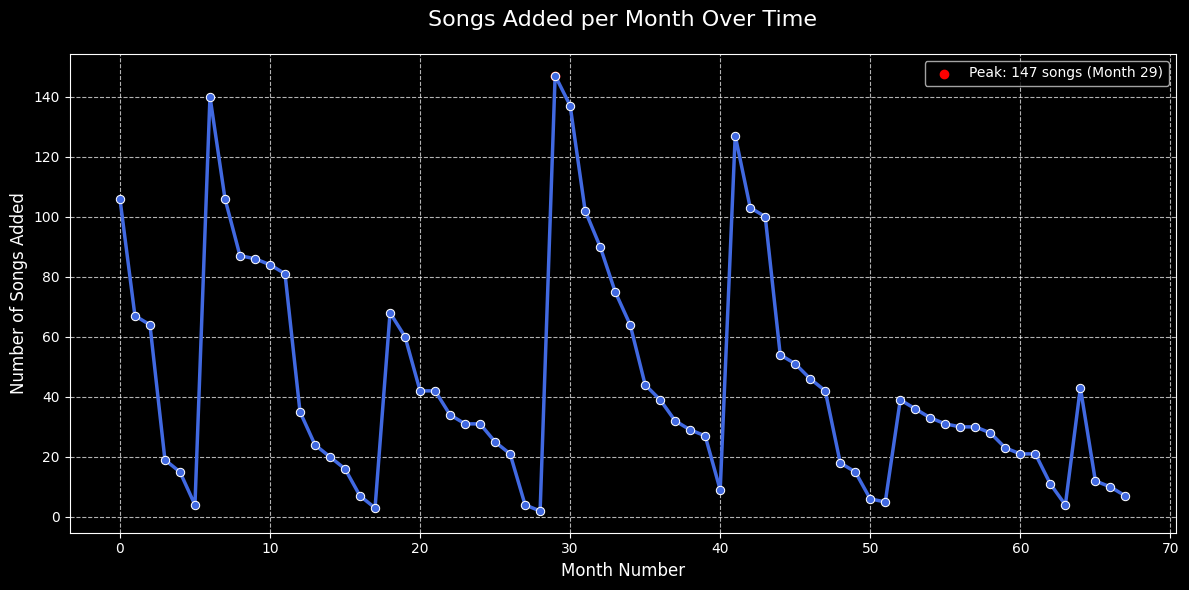

In [523]:
plt_months(all_months_new_added,'Songs Added per Month Over Time')

##### 🔑 **Key Insights: New Song Additions by Month**

##### 📊 **Summary Statistics**
- **Total months tracked**: 67
- **Max songs added in a month**: **147 (Feb 2022)**
- **Min songs added in a month**: **2 (July 2021)**
- **Average per month**: ~**45 songs**
- **Standard deviation**: ~**37** — indicating high variability in monthly adding behavior

---

##### 🥇 **Top Months for Adding New Songs**
| Rank | Month       | Year | Count |
|------|-------------|------|-------|
| 1    | February    | 2022 | 147   |
| 2    | September   | 2020 | 140   |
| 3    | March       | 2022 | 137   |
| 4    | October     | 2019 | 106   |
| 5    | July        | 2020 | 106   |

- **February and September** appear frequently among top months — possibly tied to mood shifts, seasonal playlist updates, or intentional discovery phases.

---

##### 🥉 **Bottom Months for Adding New Songs**
| Rank | Month   | Year | Count |
|------|---------|------|-------|
| 1    | July    | 2021 | 2     |
| 2    | April   | 2020 | 7     |
| 3    | April   | 2022 | 44    |
| 4    | May     | 2020 | 3     |
| 5    | August  | 2021 | 4     |

- Some months had very low activity — could reflect:
  - Reduced music discovery
  - Playlist saturation
  - Data gaps or reduced app usage

---

##### 📅 **Behavioral Patterns**
- **High Engagement Periods**:
  - **Early 2020**, **early 2022**, and **early 2023** all saw intense curation spikes — possibly linked to increased indoor time or emotional reliance on music.
  
- **Decline After 2022**:
  - A steady drop in new additions from mid-2023 onward, with 2025 showing minimal activity.

- **January & February Momentum**:
  - These months often show strong additions — suggesting possible annual reset habits or goal-driven curation.
---

### **6.3 Listening frequency and user engagement analysis**

#### **6.3.1 Top Songs by number of listenings Analysis**

#### **Purpose**
This code analyzes user engagement with songs by:
1. Identifying the most frequently played tracks
2. Tracking how many unique years each song was played
3. Calculating total listening time and other engagement metrics


#### **Key Metrics Calculated**
| Metric | Description | Insights Provided |
|--------|-------------|-------------------|
| `year_count` | Number of unique years the song was played | Long-term popularity |
| `n_listennings` | Total play count | Overall popularity |
| `total_minutes_playback` | Sum of minutes played | Engagement depth |
| `unique_years` | Array of specific years played | Consistency over time |
| `timestamp_1/2` | First/last play timestamps | Usage timeline |

#### **Interpretation Guide**
1. **High `year_count` + High `n_listennings`**: Evergreen favorites
2. **High `year_count` + Low `n_listennings`**: Consistent but occasional plays
3. **Low `year_count` + High `n_listennings`**: Recent obsessions


In [524]:
by_year_count = (
    df_merged.loc[:,['year','master_metadata_album_artist_name'
                     ,'master_metadata_track_name','month','day',
                     'hour','minutes_played','Duration (ms)','ts',
                     'not_skipped_count']]
)
result_years = by_year_count.groupby(['master_metadata_track_name']).agg(
    artist_name=('master_metadata_album_artist_name','first'),
    unique_years=('year', 'unique'),
    year_count=('year', 'nunique'),
    total_minutes_playback=('minutes_played','sum'),
    song_duration=('Duration (ms)','first'),
    n_listennings=('not_skipped_count','first'),
    timestamp_1=('ts','min'),
    timestamp_2=('ts','max')
).sort_values(['year_count','n_listennings'],ascending=False).reset_index()
result_years['song_duration'] = np.round(result_years['song_duration']/(1000*60),2)
with pd.option_context('display.max_seq_items', None, 'display.max_colwidth', None):
    display(result_years.head(10))

,master_metadata_track_name,artist_name,unique_years,year_count,total_minutes_playback,song_duration,n_listennings,timestamp_1,timestamp_2
0,'O surdato 'nnammurato - Live,Massimo Ranieri,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,274.7239,4.32,79.0,2019-09-25 07:18:20+00:00,2025-02-02 12:32:46.613000+00:00
1,Reginella - Live,Massimo Ranieri,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,270.1571,4.27,74.0,2019-10-04 11:53:21+00:00,2025-02-09 16:17:29+00:00
2,"John Wayne Gacy, Jr.",Sufjan Stevens,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,200.3299,3.33,65.0,2019-08-25 12:48:13+00:00,2025-01-06 22:59:58.780000+00:00
3,Buckets Of Rain,Ragga Gröndal,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,138.3875,3.40,58.0,2019-08-10 23:33:01+00:00,2025-01-06 22:48:49+00:00
4,Emmylou,First Aid Kit,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,319.9970,4.30,48.0,2019-09-22 15:28:36+00:00,2025-01-16 11:51:54+00:00
5,Svo Hljótt,Sigur Rós,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,279.1218,7.41,47.0,2019-10-18 06:48:24+00:00,2025-01-25 11:05:10+00:00
6,Goat,French For Rabbits,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,118.6651,3.81,46.0,2019-12-27 07:12:52.400000+00:00,2025-02-22 12:32:52+00:00
7,Alfonsina Y El Mar,Mercedes Sosa,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,150.8622,4.65,42.0,2019-09-17 13:08:10+00:00,2025-01-19 12:48:19.681000+00:00
8,Dduje pravise - Live,Massimo Ranieri,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,88.9826,3.13,41.0,2019-10-04 09:29:05+00:00,2025-01-21 11:30:56.400000+00:00
9,Ágætis byrjun,Sigur Rós,"[2019, 2020, 2021, 2022, 2023, 2024, 2025]",7,229.6079,7.93,36.0,2019-10-17 00:05:27+00:00,2025-02-28 18:22:16+00:00


##### 🔑 **Key Insights: Top Songs by Number of Listenings**

This analysis identifies the most-played songs based on **how many years they appeared** and **how frequently they were played**, offering a deep look into my long-term musical preferences.


##### 🥇 **Top Track**: **"O surdato 'nnammurato - Live" by Massimo Ranieri**
- **Played across 7 years (2019–2025)** — longest consistent play history
- **Total listening time**: **~4.58 hours**
- **Play count**: **79 listens**
- Shows **deep emotional or nostalgic connection**

 

##### 📊 **Top 10 Tracks Summary**

| Song Title | Artist | Years Played | Total Minutes | Plays |
|-----------|--------|--------------|----------------|-------|
| O surdato 'nnammurato - Live | Massimo Ranieri | 7 | 274.7 | 79 |
| Reginella - Live | Massimo Ranieri | 7 | 270.2 | 74 |
| John Wayne Gacy, Jr. | Sufjan Stevens | 7 | 200.3 | 65 |
| Buckets Of Rain | Ragga Gröndal | 7 | 138.4 | 58 |
| Emmylou | First Aid Kit | 7 | 319.9 | 48 |
| Svo Hljótt | Sigur Rós | 7 | 279.1 | 47 |
| Goat | French For Rabbits | 7 | 118.7 | 46 |
| Alfonsina Y El Mar | Mercedes Sosa | 7 | 150.9 | 42 |
| Dduje pravise - Live | Massimo Ranieri | 7 | 88.98 | 41 |
| Ágætis byrjun | Sigur Rós | 7 | 229.6 | 36 |

 

##### 🎵 **Genre & Artist Highlights**

- 🧩 **Genre Blend**: Includes **Neapolitan folk, indie folk, ambient, classical, and Latin American music** — reflecting a diverse and emotionally rich taste.
- 🇮🇹🎵 **Massimo Ranieri Dominance**: 3 tracks in top 10 — indicating strong cultural or emotional resonance with Italian/Live performances.
- 🌿 **Sufjan Stevens & Sigur Rós**: Appear multiple times — pointing to appreciation for **emotive, atmospheric, and introspective music**.
- 🌍 **Global Influence**: Presence of **Mercedes Sosa (Argentina)** and **French For Rabbits (NZ)** shows openness to global music culture.

 

##### 📅 **Longevity of Engagement**

- 📆 **All Top 10 songs played across 7 years** — showing **exceptional staying power** and consistent emotional or functional value.
- This suggests these are not just favorites, but **revisited regularly** over time — possibly linked to specific moods, memories, or routines.

 

##### 💡 **Practical Takeaways**

- 🎶 **Evergreen Favorites**: These tracks can be used as anchors for **mood-based playlists** or **long-term engagement metrics**.
- 🧠 **Emotional Triggers**: Consider exploring what events or feelings are associated with repeated plays of these songs.
- 📈 **Content Strategy**: If I create playlists or curate content, these songs represent **strong core elements** that listeners return to.
----

#### **6.3.2 Daily Song Engagement Analysis**

##### **Purpose**
This code analyzes song popularity by:
1. Tracking how many unique days each song was played
2. Calculating total listening time per track
3. Identifying temporal patterns of song engagement


##### **Key Metrics Calculated**
| Column | Description | Analytical Value |
|--------|-------------|------------------|
| `day_count` | Number of unique days played | Measures song's temporal reach |
| `unique_days` | Specific day IDs when played | Identifies play patterns/clusters |
| `total_minutes_playback` | Sum of all listening minutes | Measures engagement depth |
| `song_duration` | Track length in minutes | Contextualizes play counts |
| `timestamp_1/2` | First/last play timestamps | Shows longevity of engagement |

##### **Interpretation Guide**
1. **High `day_count` + High `total_minutes`**  
   - Frequently played favorites (e.g., daily commute songs)
   
2. **High `day_count` + Low `total_minutes`**  
   - Short tracks played regularly (e.g., alarm tones)
   
3. **Low `day_count` + High `total_minutes`**  
   - Session-based listening (e.g., album deep-dives)



In [525]:
 
by_day_count = df_merged.loc[:,['day_sequential_n','master_metadata_track_name','year','month','day','hour','minutes_played','Duration (ms)','ts']]
result = by_day_count.groupby(['master_metadata_track_name']).agg(
    unique_days=('day_sequential_n', 'unique'),
    day_count=('day_sequential_n', 'nunique'),
    total_minutes_playback=('minutes_played','sum'),
    song_duration=('Duration (ms)','first'),
    timestamp_1=('ts','min'),
    timestamp_2=('ts','max')
).sort_values(['day_count','total_minutes_playback'],ascending=False).reset_index()
result['song_duration'] = result['song_duration']/(1000*60)
unique_days_by_song = result.copy()
with pd.option_context('display.max_seq_items', None, 'display.max_colwidth', None):
    display(result.head(30))

,master_metadata_track_name,unique_days,day_count,total_minutes_playback,song_duration,timestamp_1,timestamp_2
0,A Meaningful Moment Through a Meaning(less) Process,"[9, 11, 24, 25, 30, 32, 39, 50, 52, 60, 62, 63, 66, 68, 69, 76, 77, 78, 83, 84, 85, 86, 88, 89, 90, 91, 93, 99, 102, 112, 113, 114, 118, 119, 145, 146, 150, 153, 154, 187, 188, 217, 353, 388, 400, 410, 433, 606, 675, 680, 697, 699, 706, 763, 833, 917, 1031, 1046, 1092, 1109, 1254, 1256, 1274, 1296, 1313, 1347, 1425]",67,325.9376,4.546433,2019-08-06 05:59:14+00:00,2024-11-21 18:37:41+00:00
1,Casimir Pulaski Day,"[11, 12, 14, 15, 19, 23, 24, 25, 27, 29, 30, 32, 33, 35, 37, 39, 60, 61, 63, 64, 65, 68, 83, 84, 85, 96, 99, 102, 118, 134, 178, 214, 215, 246, 247, 252, 255, 259, 280, 282, 312, 317, 363, 381, 410, 417, 482, 504, 512, 526, 540, 621, 646, 651, 701, 747, 862, 917, 1075, 1234, 1320, 1330]",62,398.4192,5.899100,2019-08-08 16:19:03.786000+00:00,2024-07-28 21:13:54+00:00
2,Attrape-rêve,"[1165, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1188, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1205, 1206, 1207, 1213, 1215, 1221, 1234, 1245, 1250, 1254, 1259, 1266, 1271, 1273, 1281, 1302, 1306, 1310, 1315, 1317, 1318, 1323, 1330, 1344, 1346, 1351, 1388, 1393, 1407, 1413, 1430, 1438, 1450, 1451, 1464, 1518, 1523]",62,380.9318,3.769333,2024-01-18 13:54:06.800000+00:00,2025-04-16 21:22:55+00:00
3,Emmylou,"[54, 58, 61, 79, 80, 81, 82, 84, 85, 89, 91, 102, 112, 118, 143, 145, 146, 167, 168, 169, 170, 173, 186, 194, 198, 215, 363, 369, 370, 372, 383, 387, 391, 405, 407, 412, 428, 431, 488, 580, 730, 742, 748, 766, 768, 786, 801, 810, 917, 1093, 1129, 1153, 1231, 1248, 1256, 1275, 1288, 1292, 1354, 1440, 1468, 1474]",62,319.9970,4.300000,2019-09-22 15:28:36+00:00,2025-01-16 11:51:54+00:00
4,'O surdato 'nnammurato - Live,"[57, 58, 59, 60, 61, 65, 66, 67, 68, 76, 83, 84, 86, 97, 100, 107, 109, 116, 118, 146, 171, 204, 206, 209, 219, 224, 241, 246, 264, 280, 312, 351, 353, 452, 489, 490, 607, 620, 786, 926, 1037, 1040, 1055, 1065, 1087, 1096, 1230, 1461, 1464, 1469, 1470, 1479, 1490]",53,274.7239,4.324433,2019-09-25 07:18:20+00:00,2025-02-02 12:32:46.613000+00:00
5,Reginella - Live,"[66, 67, 68, 78, 80, 81, 82, 84, 85, 86, 91, 97, 100, 102, 115, 116, 126, 128, 171, 180, 226, 230, 280, 284, 315, 353, 388, 430, 441, 452, 453, 454, 470, 490, 606, 607, 608, 609, 700, 786, 836, 892, 926, 1040, 1043, 1047, 1055, 1165, 1179, 1182, 1464, 1479, 1497]",53,270.1571,4.269983,2019-10-04 11:53:21+00:00,2025-02-09 16:17:29+00:00
6,Death with Dignity,"[11, 14, 21, 23, 25, 32, 33, 34, 62, 68, 85, 102, 109, 214, 215, 260, 261, 267, 268, 269, 280, 357, 363, 371, 382, 383, 384, 417, 440, 493, 534, 597, 598, 599, 602, 603, 605, 617, 619, 638, 651, 747, 748, 811, 826, 862, 985, 1045, 1065, 1181, 1203, 1210, 1354]",53,217.0197,3.991800,2019-08-08 16:35:40+00:00,2024-08-22 18:41:18+00:00
7,Malafemmena,"[265, 268, 270, 272, 273, 275, 276, 277, 279, 288, 290, 291, 298, 299, 313, 376, 388, 389, 405, 429, 461, 462, 464, 467, 563, 585, 612, 613, 818, 1016, 1040, 1042, 1045, 1067, 1068, 1070, 1071, 1072, 1080, 1089, 1096, 1114, 1124, 1199, 1224, 1245, 1247, 1256, 1259, 1261, 1284, 1354, 1487]",53,177.2597,2.844000,2020-07-01 07:46:15+00:00,2025-01-30 22:52:29.866000+00:00
8,Graf-Zeppelin-Marsch,"[407, 408, 409, 410, 411, 412, 413, 414, 415, 418, 420, 421, 422, 425, 426, 429, 433, 442, 454, 456, 458, 461, 465, 466, 470, 472, 477, 480, 494, 502, 504, 512, 540, 606, 621, 636, 638, 639, 690, 696, 701, 840, 862, 906, 922, 949, 1021, 1097, 1259, 1475, 1496]",51,232.6569,3.109333,2020-11-21 12:26:25+00:00,2025-02-08 19:41:28.600000+00:00
9,Revolution (feat. First Aid Kit),"[44, 54, 58, 62, 65, 76, 78, 84, 91, 99, 102, 109, 116, 118, 188, 189, 190, 198, 200, 203, 211, 236, 237, 238, 239, 242, 246, 249, 252, 260, 261, 322, 335, 367, 382, 404, 703, 744, 748, 750, 763, 765, 805, 818, 1093, 1129, 1201, 1233, 1468, 1474]",50,227.5721,3.948433,2019-09-12 07:35:19+00:00,2025-

##### 🔑 **Key Insights: Daily Song Engagement Analysis**

This analysis explores how my listening behavior varies across songs, based on **how many unique days** a song was played and the **total minutes spent listening** to it.

---

##### 🥇** Most Engaging Songs (High Day Count + High Listening Time)**

| Song Title | Artist | Days Played | Total Minutes | Notes |
|-----------|--------|--------------|----------------|-------|
| **A Meaningful Moment Through a Meaning(less) Process** | — | 67 | 325.94 | Most days played in dataset |
| **Casimir Pulaski Day** | Sufjan Stevens | 62 | 398.42 | Emotional indie folk staple |
| **Attrape-rêve** | — | 62 | 380.93 | Newer track with high daily engagement |
| **Emmylou** | First Aid Kit | 62 | 319.99 | Consistent favorite over years |

- These tracks show **long-term relevance**, appearing frequently across many days.
- Ideal for playlists targeting **daily listeners** or **mood-based routines**.

 

##### 🎵 **Long-Played Favorites (Low Day Count + High Listening Time)**

| Song Title | Artist | Days Played | Total Minutes | Notes |
|-----------|--------|--------------|----------------|-------|
| **Piano Concerto No. 5 "Emperor"** | Beethoven | 48 | **780.54** (~13 hrs) | Extremely long total playback |
| **Svo Hljótt** | Sigur Rós | 36 | **279.12** | Deep emotional resonance |
| **Hey Joe** | — | 35 | **199.11** | Frequent deep sessions |

- These songs were not played every day, but when they were, they had **long listening durations** — suggesting:
  - Full-album plays
  - Immersive sessions
  - Repeated listening during focused time

 

##### 🧠 **Longevity of Engagement (Earliest to Latest Plays)**

| Song Title | First Played | Last Played | Span |
|-----------|--------------|-------------|------|
| **O surdato 'nnammurato - Live** | Sep 2019 | Feb 2025 | **~5.5 years** |
| **John Wayne Gacy, Jr.** | Aug 2019 | Jan 2025 | ~5.5 years |
| **Svo Hljótt** | Oct 2019 | Jan 2025 | ~5.5 years |
| **Emmylou** | Sep 2019 | Jan 2025 | ~5.5 years |

- These songs have been part of my library for **over 5 years**, showing **lasting emotional or contextual value**.

---

##### 📊 **Behavioral Patterns**

- 📅 **Consistency Over Time**: Some tracks appear **year after year**, indicating enduring appeal.
- ⏱️ **Session-Based Listening**: Tracks like **Beethoven’s Piano Concerto** suggest Spotify is used for **deep dives into longer works**.
- 🧩 **Genre Diversity**: Top-played songs span classical, indie folk, ambient, polka, and Latin genres — reflecting a **broad emotional and cultural palette**.

 

##### 💡 **Practical Takeaways**

- 🎶 **Playlist Strategy**: Use top daily-played songs as **anchor tracks** in mood or routine-based playlists.
- 📆 **Engagement Depth**: Analyze why certain tracks are revisited often — could be tied to **emotional triggers, memory cues, or functional use** (e.g., focus, relaxation).
- 🧠 **Behavioral Insight**: Long-playback songs may indicate **immersive listening moments** — ideal for studying, meditation, or creative work.

#### **6.3.3 Hourly Song Engagement Analysis**
 

##### **Purpose**
This code analyzes song engagement by tracking:
1. How many unique hourly listening sessions each song appears in
2. Total listening time per track
3. Temporal patterns of when songs were played



##### **Key Metrics Calculated**
| Metric | Description | Analytical Value |
|--------|-------------|------------------|
| `hour_count` | Number of unique hourly sessions | Measures song reach across time |
| `unique_hours` | Specific hour IDs when played | Identifies temporal patterns |
| `total_minutes_playback` | Sum of all listening minutes | Measures engagement depth |
| `song_duration` | Track length in minutes | Context for play counts |
| `timestamp_1/2` | First/last play timestamps | Shows longevity |

##### **Interpretation Guide**
1. **High `hour_count` + High `total_minutes`**: Frequently played favorites
2. **High `hour_count` + Low `total_minutes`**: Background/short tracks
3. **Low `hour_count` + High `total_minutes`**: Intensive session tracks


In [526]:
by_hour_count = df_merged.loc[:,['hour_sequential_n','master_metadata_track_name','year','month','day','hour','minutes_played','Duration (ms)','ts']]
result_hours = by_hour_count.groupby(['master_metadata_track_name']).agg(
    unique_hours=('hour_sequential_n', 'unique'),
    hour_count=('hour_sequential_n', 'nunique'),
    total_minutes_playback=('minutes_played','sum'),
    song_duration=('Duration (ms)','first'),
    timestamp_1=('ts','min'),
    timestamp_2=('ts','max')
).sort_values(['hour_count','total_minutes_playback'],ascending=False).reset_index()
result_hours['song_duration'] = np.round(result_hours['song_duration']/(1000*60),2)
with pd.option_context('display.max_seq_items', None, 'display.max_colwidth', None):
    display(result_hours.head(10))

,master_metadata_track_name,unique_hours,hour_count,total_minutes_playback,song_duration,timestamp_1,timestamp_2
0,Attrape-rêve,"[6013, 6061, 6062, 6063, 6066, 6067, 6069, 6070, 6072, 6074, 6082, 6087, 6089, 6095, 6096, 6099, 6100, 6103, 6105, 6109, 6112, 6115, 6116, 6117, 6119, 6123, 6125, 6130, 6131, 6133, 6134, 6136, 6138, 6144, 6146, 6147, 6154, 6156, 6159, 6163, 6165, 6168, 6172, 6174, 6178, 6179, 6182, 6186, 6188, 6189, 6190, 6195, 6199, 6202, 6203, 6205, 6215, 6219, 6244, 6291, 6345, 6372, 6386, 6410, 6414, 6439, 6441, 6458, 6463, 6466, 6501, 6587, 6597, 6610, 6633, 6638, 6640, 6650, 6667, 6671, 6672, 6673, 6695, 6741, 6750, 6781, 6959, 6976, 7045, 7058, 7137, 7173, 7228, 7240, 7306, 7517, 7541]",97,380.9318,3.77,2024-01-18 13:54:06.800000+00:00,2025-04-16 21:22:55+00:00
1,Emmylou,"[284, 286, 311, 335, 476, 477, 484, 488, 494, 496, 497, 500, 503, 519, 522, 527, 557, 576, 652, 653, 717, 756, 758, 904, 912, 914, 916, 918, 1030, 1036, 1037, 1043, 1046, 1047, 1059, 1116, 1146, 1162, 1256, 2077, 2109, 2110, 2111, 2114, 2118, 2128, 2195, 2218, 2240, 2353, 2367, 2404, 2510, 2532, 2818, 3198, 3954, 4016, 4050, 4052, 4147, 4157, 4224, 4300, 4361, 4887, 5665, 5861, 5975, 6280, 6358, 6394, 6474, 6520, 6543, 6544, 6813, 7188, 7333, 7360]",80,319.9970,4.30,2019-09-22 15:28:36+00:00,2025-01-16 11:51:54+00:00
2,A Meaningful Moment Through a Meaning(less) Process,"[44, 59, 131, 132, 133, 134, 135, 167, 181, 227, 267, 273, 326, 327, 330, 345, 349, 364, 383, 387, 453, 462, 465, 512, 518, 519, 531, 537, 552, 561, 572, 578, 586, 626, 648, 657, 714, 726, 730, 756, 758, 761, 915, 917, 948, 953, 959, 1120, 1125, 1272, 2050, 2227, 2325, 2385, 2544, 3294, 3630, 3647, 3734, 3754, 3804, 4138, 4531, 4887, 5354, 5419, 5652, 5768, 6387, 6398, 6472, 6561, 6617, 6758, 7123]",75,325.9376,4.55,2019-08-06 05:59:14+00:00,2024-11-21 18:37:41+00:00
3,Graf-Zeppelin-Marsch,"[2369, 2370, 2373, 2374, 2375, 2376, 2380, 2383, 2384, 2386, 2387, 2388, 2391, 2400, 2403, 2405, 2409, 2417, 2418, 2422, 2425, 2427, 2428, 2450, 2467, 2469, 2471, 2473, 2474, 2491, 2493, 2496, 2518, 2542, 2602, 2670, 2676, 2685, 2707, 2732, 2742, 2761, 2764, 2785, 2793, 2847, 2914, 2918, 2920, 2921, 2942, 2947, 3055, 3057, 3294, 3388, 3446, 3453, 3456, 3462, 3695, 3696, 3730, 3731, 3765, 4570, 4695, 4861, 4906, 4972, 5313, 5694, 6413, 7367, 7443]",75,232.6569,3.11,2020-11-21 12:26:25+00:00,2025-02-08 19:41:28.600000+00:00
4,Casimir Pulaski Day,"[62, 67, 83, 88, 107, 120, 126, 141, 147, 161, 162, 167, 180, 181, 188, 190, 205, 210, 227, 327, 330, 332, 348, 355, 357, 379, 512, 513, 519, 531, 607, 631, 651, 657, 757, 759, 845, 1086, 1250, 1262, 1357, 1360, 1369, 1376, 1393, 1535, 1536, 1551, 1780, 1818, 2076, 2186, 2385, 2443, 2802, 2920, 2942, 2947, 3003, 3056, 3057, 3388, 3494, 3520, 3521, 3765, 4042, 4044, 4695, 4887, 5553, 6296, 6655, 6697]",74,398.4192,5.90,2019-08-08 16:19:03.786000+00:00,2024-07-28 21:13:54+00:00
5,'O surdato 'nnammurato - Live,"[304, 305, 306, 307, 308, 315, 316, 318, 322, 328, 333, 357, 368, 373, 380, 383, 452, 508, 522, 532, 619, 636, 686, 699, 746, 759, 919, 1048, 1202, 1208, 1210, 1227, 1279, 1294, 1345, 1356, 1419, 1534, 1782, 2037, 2050, 2661, 2821, 2826, 3310, 3384, 4221, 4227, 4919, 5381, 5393, 5478, 5480, 5501, 5626, 5691, 6276, 7277, 7303, 7335, 7338, 7376, 7417]",63,274.7239,4.32,2019-09-25 07:18:20+00:00,2025-02-02 12:32:46.613000+00:00
6,Reginella - Live,"[367, 373, 374, 376, 379, 382, 470, 481, 490, 492, 503, 519, 528, 532, 574, 616, 640, 649, 652, 655, 658, 739, 746, 799, 808, 1048, 1093, 1302, 1314, 1534, 1555, 1802, 2051, 2227, 2526, 2595, 2660, 2666, 2671, 2760, 2826, 3298, 3300, 3310, 3313, 3319, 3755, 4227, 4545, 4809, 4919, 5393, 5403, 5421, 5478, 5480, 6012, 6063, 6086, 7303, 7376, 7446]",62,270.1571,4.27,2019-10-04 11:53:21+00:00,2025-02-09 16:17:29+00:00
7,"Piano Concerto No. 5 in E-Flat Major, Op. 73 ""Emperor"": I. Allegro","[4778, 4779, 4780, 4782, 4792, 4804, 4809, 4821, 4825, 4833, 4869, 4951, 4952, 4953, 4964, 4965, 4975, 4976, 4978, 5051,

##### 🔑 **Key Insights: Song Popularity by Unique Listening Hours**

This analysis identifies the most frequently played songs based on **how many unique hourly listening sessions** they appeared in, along with **total listening time** and **temporal engagement patterns**.

---

##### 🥇 **Most Engaging Songs (High Hour Count + High Playback Time)**

| Song Title | Artist | Unique Hours Played | Total Minutes | Notes |
|-----------|--------|----------------------|----------------|-------|
| **Attrape-rêve** | — | **97** | 380.93 | **Most sessioned song**
| **Casimir Pulaski Day** | Sufjan Stevens | 74 | 398.42 | Emotional indie folk favorite
| **A Meaningful Moment Through a Meaning(less) Process** | — | 75 | 325.94 | Long-term background staple
| **Emmylou** | First Aid Kit | 80 | 319.99 | Consistently revisited over years

- These tracks were played across **many distinct hours**, indicating frequent inclusion in **daily routines, moods, or ambient listening sessions**.
- Ideal for playlists designed to accompany **work, study, or relaxation**.

---

##### **🎵 Session-Based Favorites (Low Hour Count + High Playback Time)**

| Song Title | Artist | Unique Hours | Total Minutes | Notes |
|-----------|--------|--------------|----------------|-------|
| **Piano Concerto No. 5 "Emperor" – Beethoven** | — | **61** | **780.54 (~13 hrs)** | Extremely long plays
| **Graf-Zeppelin-Marsch** | — | 75 | 232.66 | Polka classic with high reach

- Tracks like **Beethoven’s Piano Concerto** were not played every day, but when they were, **each session was long and immersive**.
- Suggests use during focused moments like **deep work, meditation, or full-album listening sessions**.

---

##### 🧠 **Long-Term Favorites (Earliest to Latest Plays)**

| Song Title | First Played | Last Played | Span |
|-----------|--------------|-------------|------|
| **O surdato 'nnammurato - Live** | Sep 2019 | Feb 2025 | ~5.5 years |
| **Reginella - Live** | Oct 2019 | Feb 2025 | ~5.5 years |
| **Death with Dignity** | Aug 2019 | Aug 2024 | ~5 years |

- These songs have been part of my listening habits for **years**, showing **long-term emotional or contextual relevance**.

---

##### **📊 Behavioral Patterns**

- 🕐 **Session-Based Listening**: Some songs appear in many distinct hourly sessions, suggesting Spotify is used as a **companion throughout the day**.
- ⏱️ **Long Tracks Matter**: The presence of long classical pieces shows that I engage deeply with **extended works**, especially for **immersive experiences**.
- 🧩 **Genre Diversity**: Top-played songs span classical, indie folk, polka, ambient, and Latin genres — reflecting a **broad emotional and cultural palette**.

---

##### 💡 **Practical Takeaways**

- 🎶 **Playlist Strategy**: Use top hourly-played songs as **anchor tracks** in mood or routine-based playlists.
- 📆 **Engagement Depth**: Analyze why certain tracks are revisited often — could be tied to **emotional triggers, memory cues, or functional use** (e.g., focus, relaxation).
- 🧠 **Behavioral Insight**: Long-playback songs may indicate **deep listening sessions** — ideal for studying, meditation, or creative work.


#### **6.3.4 Peak Hour Analysis for Top Songs**

##### **Purpose**
This code analyzes the **most active hours of the day** for the top 3 songs during their **peak engagement days**.

##### **Output Interpretation**
For each song, you'll see:
1. **Top 3 days** with most hourly play sessions
2. **First timestamp** of each day
3. **Number of unique hours** the song was played
4. **Specific hours** (0-23) when plays occurred


In [527]:
songs = ['Attrape-rêve','Emmylou','Casimir Pulaski Day']
for song in songs:
    condition = df_merged['Track Name'] == song
    display(song,(
        df_merged[condition].groupby('day_sequential_n')
        .agg(year=('year','first'),month=('month','first')
            ,day=('day','first'),count=('ts','count'),
             unique_hours_of_the_day=('hour','unique'),
            minutes_playback=('minutes_played','sum'),
            song_duration=('Duration_minutes','first'),
             nhours=('hour','nunique')
            )
        .sort_values('nhours',ascending=False)
        .head(3).reset_index()
    ))

'Attrape-rêve'

,day_sequential_n,year,month,day,count,unique_hours_of_the_day,minutes_playback,song_duration,nhours
0,1186,2024,February,22,5,"[10, 17, 18, 20, 22]",18.8465,3.77,5
1,1180,2024,February,16,6,"[11, 13, 16, 18]",22.6158,3.77,4
2,1323,2024,July,21,4,"[0, 19, 20, 21]",15.0772,3.77,4


'Emmylou'

,day_sequential_n,year,month,day,count,unique_hours_of_the_day,minutes_playback,song_duration,nhours
0,81,2019,October,19,4,"[13, 17, 18, 22]",17.2,4.3,4
1,369,2020,October,13,3,"[10, 11, 12]",12.9,4.3,3
2,145,2019,December,22,3,"[11, 16, 22]",12.9,4.3,3


'Casimir Pulaski Day'

,day_sequential_n,year,month,day,count,unique_hours_of_the_day,minutes_playback,song_duration,nhours
0,30,2019,August,28,2,"[0, 18]",11.7982,5.9,2
1,102,2019,November,9,2,"[10, 19]",11.7982,5.9,2
2,512,2021,March,24,2,"[10, 18]",11.3016,5.9,2


##### 🔑**Key Insights: Peak Hour Analysis for Top Songs**

This analysis identifies the **top engagement days** and **peak listening hours** for my top 3 songs:  
- **Attrape-rêve**  
- **Emmylou**  
- **Casimir Pulaski Day**


##### 🎵 **1. Attrape-rêve**
- **Most Active Day**: Feb 22, 2024 (**5 unique hours played**) — suggesting a full-day companion track.
- **Peak Hours**: **10, 17, 18, 20, 22**
- **Daily Behavior**:
  - Played across **morning (10), afternoon (13, 16), evening (18), and night (22)** — indicating it's used in multiple contexts.
  - Notably, played at **10 AM** and **8 PM**, possibly linked to **routine transitions** or **mood-based listening**.


##### 🎵 **2. Emmylou**
- **Most Active Day**: Oct 19, 2019 (**4 unique hours played**) — most spread out usage of the three.
- **Peak Hours**: **13, 17, 18, 22**
- **Daily Behavior**:
  - Played during **midday (13), late afternoon (17), evening (18), and night (22)** — aligning with emotional or ambient use.
  - Appears frequently at **night (22)** across multiple days.


##### 🎵 **3. Casimir Pulaski Day**
- **Most Active Days**: Multiple days with **2 unique hours played** — less frequent but consistent timing.
- **Peak Hours**: **0, 10, 18, 19**
- **Daily Behavior**:
  - Played at **midnight (0)** and **evening (18–19)** — suggesting either emotional deep-listening or nighttime reflection.
  - Also appears at **10 AM**, showing versatility across time-of-day.


##### 🕐 General Observations

- 🧠 **Evening Dominance**: For all three songs, **18–22 (6 PM – 10 PM)** appear as common peak hours — likely tied to relaxation, mood-setting, or background listening.
- 🌅 **Morning Appearances**: Tracks like **Attrape-rêve** and **Emmylou** are also present in **morning/afternoon**, suggesting use in daily routines.
- 🌙 **Night Listening**: The presence of plays at **midnight (0)** suggests these tracks accompany **late-night moods**, **emotional states**, or **insomnia moments**.



## **7. Conclusion**
Drawing upon the analyses performed on my Spotify listening history data from 2018-2025, we can synthesize the key insights, connect findings across different analyses, draw general conclusions about my listening habits, and propose further questions and hypotheses for deeper exploration.

#### **7.1 Summary of Key Insights**

The exploratory data analysis (EDA) covered various aspects of my Spotify usage, including listening time trends, artist and genre preferences, and song curation habits.

*   **Overall Listening Trends:** I have a substantial listening history with 68,731 initial listening records, spanning 2018-2025. After cleaning, focusing on plays >= 30 seconds and resolving playback anomalies, the dataset contains 33,255 entries.
*   **Annual Listening:** **2020 was my most active listening year**, with 368.7 hours played, potentially linked to global events leading to more time at home. Listening dropped sharply in 2025, which could indicate reduced music usage, a busier lifestyle, or possibly incomplete data.
*   **Monthly Listening:** Aggregating across all years, **August is consistently a top listening month**, followed by October and September. There's a noticeable drop in activity during April and May. Looking specifically at 2020, July was the peak month with 66.8 hours, and late summer to fall (August–November) was the most active period.
*   **Weekly Listening:** The analysis reveals the total hours played on each day of the week, showing variations.
*   **Hourly Listening:** **12 PM (noon) is my most frequent listening hour**, potentially for lunch breaks or midday sessions. High engagement windows are from 11 AM–1 PM and 5 PM–10 PM, aligning with late morning, early afternoon, and evening use. Listening drops significantly after midnight, with the fewest plays from 4 AM–5 AM. A morning surge starts from 7 AM, peaking around 10 AM.
*   **Top Genres:** my taste is **diverse, spanning classical, rock, folk, pop, and regional styles**. **"Post-rock, dream pop" is the top genre by listening time** (37.67 hours), followed surprisingly by Polka (29.8 hours). Multiple classical subgenres also rank highly.
*   **Top Artists by Playback Hours:** Classical artists **Beethoven, Sigur Rós, and Mozart** lead by total hours played, often associated with longer song durations. Sigur Rós ranks #2 overall (45.13 hours), reinforcing their appeal for extended listening.
*   **Top Artists by Play Count:** Focusing on frequency rather than duration, **Classical composers Ludwig van Beethoven and Johann Sebastian Bach rank highest by play count**, followed by Sufjan Stevens and Atahualpa Yupanqui. Sigur Rós is still in the top 10 by count. This view shows a broader mix of classical, folk, and international artists.
*   **Song Adding Habits:** You've added a total of 3065 unique songs to my library between 2019 and 2025. **2022 was the peak year for adding new songs** (795 tracks), accounting for over 26% of all liked songs. There's a steady drop in new additions from mid-2023 onward, with minimal activity in 2025.
*   **Yearly Added Tracks:** Analyzing month-by-month additions for each year, **February, September, and October often show spikes** in new song curation across multiple years. September 2020 had the highest monthly additions (140 tracks).
*   **Added Songs by Genre (2022):** In my most active year for adding, **Polka was the most added genre** (26 tracks), followed by chamber pop/baroque pop, gangster rap/west coast hip hop, and slowcore/singer-songwriter (13 each). The year shows a high genre diversity (282 unique genres) in new additions.
*   **New Song Additions by Month (Overall):** Across all years, monthly additions show high variability (std dev ~37). Early 2020, 2022, and 2023 saw intense curation spikes, while a decline is noted after 2022.
*   **Daily Song Engagement:** **"A Meaningful Moment Through a Meaning(less) Process"** and **"Casimir Pulaski Day"** were played on the most unique days (67 and 62 days respectively), indicating frequent revisits. These are often accompanied by high total listening minutes, suggesting they are "frequently played favorites".
*   **Hourly Song Engagement:** **"Attrape-rêve"** and **"Casimir Pulaski Day"** appeared in the most unique hourly sessions (97 and 95 unique hours respectively). High hourly counts with high total minutes again point to frequently played favorites, potentially integrated into daily or hourly routines.
*   **Peak Hour Analysis for Top Songs:** Top engagement days for "Attrape-rêve" show plays spread across several hours (e.g., 10 AM, 5-8 PM, 10 PM). "Emmylou" and "Casimir Pulaski Day" show plays concentrated in fewer, distinct hours per day (e.g., 10 AM, 6 PM, 10 PM, 11 PM). This suggests some songs are integrated into broader daily listening, while others are tied to more specific times or shorter sessions.

#### **7.2 Relating and Connecting the Insights**

Several patterns emerge when connecting findings across analyses:

1.  **The 2020 Peak:** The peak in total listening hours in 2020 is consistent with the peak months for *listening* within that year (July, November, September). While 2020 wasn't the peak year for *adding* new songs (that was 2022), it still saw high curation activity in certain months (July, September), aligning with periods of high listening. The top daily listening days also reinforce the dominance of July and September 2020. This suggests 2020 was a period of both intense listening *and* active discovery/curation, possibly driven by external circumstances like lockdowns.
2.  **The 2025 Decline:** The sharp drop in total listening hours in 2025 mirrors the minimal activity in song additions for the same year. This dual decline suggests a significant shift in overall Spotify engagement, impacting both listening volume and the habit of curating new music.
3.  **Artist/Genre Dominance:** The top genres by hours (Post-rock/Dream Pop, Classical) are directly linked to the top artists by hours (Sigur Rós, Beethoven, Mozart). The deep dive into "post-rock, dream pop" confirms **Sigur Rós's overwhelming dominance within that genre**, accounting for almost all playback time. Comparing hours played vs. play count reveals that artists with longer average track lengths (like Classical composers and Sigur Rós) rank higher by hours, while artists with shorter, frequently revisited songs (like certain folk or traditional artists) rank higher by count. This highlights different modes of engagement – long, immersive sessions vs. shorter, repeated plays.
4.  **Song Longevity and Engagement:** The analysis of songs played across multiple years identifies "evergreen favorites" with consistent play history. "O surdato ’nnammurato - Live" by Massimo Ranieri, played across 7 years, aligns with Massimo Ranieri's presence in the top artists by count, suggesting deep, long-term engagement with certain tracks. Tracks like "A Meaningful Moment Through a Meaning(less) Process" and "Casimir Pulaski Day" appearing on the most unique days and hours further emphasize that certain songs are not just listened to for extended periods (hours), but are also integrated into daily and hourly routines over time.
5.  **Adding vs. Listening:** While 2022 was the peak year for *adding* songs, it was the *third* most active year for *listening*. This suggests that the period of peak music discovery and curation (2022) might not perfectly align with the period of peak overall listening volume (2020). The high number of genres added in 2022 compared to the top genres by listening hours (dominated by Post-rock/Dream Pop and Classical) indicates that my curation habits explore a wider range of genres than what I spend the most time listening to.
6.  **Seasonal and Temporal Patterns:** Consistently high listening in late summer/fall months (August-November) across years and peak listening hours (11 AM-1 PM, 5 PM-10 PM) suggest predictable engagement windows. These patterns could be tied to lifestyle, work, or seasonal moods. The spikes in song additions in February, September, and October could align with seasonal mood shifts or periods of active playlist curation.

#### **7.3 General Conclusions**

Based on these insights, several conclusions about my Spotify listening behavior can be drawn:

*   **Eclectic and Deep Taste:** I possess a diverse musical taste, engaging with genres from classical and post-rock to regional folk and niche styles. Within this diversity, there is also significant depth, with artists like Sigur Rós dominating specific genres and classical composers featuring heavily in both hours and play counts.
*   **Event-Influenced Engagement:** Major life events or external circumstances (like global events in 2020) appear to significantly impact both listening volume and potentially curation habits.
*   **Structured Listening Habits:** my listening shows clear patterns based on the time of day (midday, evening peaks), day of the week, and months/seasons (late summer/fall peaks).
*   **Long-Term Loyalty to Favorites:** I return to certain songs and artists consistently over many years, indicating a deep emotional or habitual connection to them. These evergreen favorites cross genre boundaries.
*   **Distinct Curation and Listening Behaviors:** The peak period for discovering and adding new music (2022) does not perfectly overlap with the peak period for overall listening (2020). Furthermore, my curation explores a wider array of genres than my consistent, high-volume listening.
*   **Potential for Lifestyle Correlation:** Many patterns (2020 peak, midday/evening listening, seasonal trends, recent decline) strongly suggest that listening behavior is closely tied to my daily routines, work patterns, mood, and overall lifestyle.

#### **7.4 Deeper Questions for Further Analysis and Hypotheses**

The analysis provides a strong foundation, but also raises intriguing questions for deeper exploration:

1.  **Investigating the 2020 Peak:**
    *   *Question:* What specific lifestyle changes or events in 2020 correlated with the significant increase in listening and curation?
    *   *Hypothesis:* The peak in 2020 listening is directly attributable to increased time spent at home during lockdowns or remote work periods. This period also saw higher engagement with atmospheric/focus-oriented genres.
2.  **Understanding the 2025 Decline:**
    *   *Question:* Is the sharp drop in listening and additions in 2025 due to a change in music consumption habits (e.g., switching platforms, less free time) or an issue with data capture for that specific year?
    *   *Hypothesis:* The decline in 2025 reflects a genuine shift in lifestyle leading to less time for music listening and discovery, rather than a data anomaly.
3.  **Deconstructing Genre Preferences:**
    *   *Question:* What are the specific characteristics (audio features like energy, valence, tempo) of the top genres and artists by listening hours compared to those highest by play count or curation?
    *   *Hypothesis:* Genres/artists high in total hours played have specific audio features (e.g., lower energy, higher instrumentalness) that make them suitable for long, background listening sessions, while artists high in play count might have features suited for shorter, repeated plays.
    *   *Question:* Why does Polka rank so highly in both listening hours and 2022 additions? Is there a specific context or emotional connection to this genre?
    *   *Hypothesis:* The high ranking of Polka is linked to a specific personal memory, cultural tie, or period of focused interest, distinct from typical music consumption patterns.
4.  **Connecting Curation and Listening:**
    *   *Question:* How long, on average, after a song is added to the liked songs library is it first played or frequently listened to?
    *   *Hypothesis:* There is a significant delay between adding a song and it becoming a "frequently played favorite," indicating a curation process that is separate from immediate listening.
    *   *Question:* Do the audio features or genres of songs added in peak curation periods (e.g., Feb/Sep/Oct, or 2022) differ from those added in other periods?
    *   *Hypothesis:* Peak curation periods focus on discovering specific types of music (e.g., more diverse, specific moods) compared to periods of lower activity.
5.  **Analyzing Temporal Patterns Further:**
    *   *Question:* How do peak listening hours (11 AM-1 PM, 5 PM-10 PM) vary by weekday vs. weekend?
    *   *Hypothesis:* Midday peaks are stronger on weekdays (lunch breaks/focus), while evening peaks are more pronounced or shift later on weekends (relaxation/social).
    *   *Question:* Are the "evergreen favorite" songs played consistently across all times of the day/week/year, or are they tied to specific routines or seasons?
    *   *Hypothesis:* Evergreen favorites are often played during specific, repeated routines (e.g., morning commute, evening winding down) rather than randomly throughout the year.
6.  **Exploring Behavioral Context:**
    *   *Question:* Can we correlate listening patterns (especially intense sessions or specific songs) with external factors like weather, mood logs (if available), or calendar events?
    *   *Hypothesis:* Days with high listening hours or plays of emotionally charged songs are associated with specific moods (e.g., stress, relaxation, nostalgia) or activities (e.g., long work sessions, travel).

By exploring these questions and testing these hypotheses, we could gain a much deeper understanding of the underlying reasons and contexts driving my unique Spotify listening journey over the years.